In [1]:
library('tidyverse')
library('ISLR2')
library('MASS')
library('caret')
library('ggplot2')
library('GGally')

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘MASS’


The following object is masked from ‘package:ISLR2’:

    Boston


The following object is masked from ‘package:dplyr’:

    select


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [2]:
heart_o <- read.csv('heart_cleveland_upload.csv')
dim(heart_o)
head(heart_o)
sum(is.na(heart_o))

[1] 297  14

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
2,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
3,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
4,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
5,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
6,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0


[1] 0

age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
and the label
condition: 0 = no disease, 1 = disease

In [3]:
heart_o$sex <- as.factor(heart_o$sex)
#heart_o$cp <- as.factor(heart_o$cp)
heart_o$fbs <- as.factor(heart_o$fbs)
heart_o$restecg <- as.factor(heart_o$restecg)
heart_o$exang <- as.factor(heart_o$exang)
heart_o$slope <- as.factor(heart_o$slope)
heart_o$thal <- as.factor(heart_o$thal)
heart_o$ca <- as.factor(heart_o$ca)
heart_o$condition <- as.factor(heart_o$condition) #target variable
head(heart_o)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
1,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
2,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
3,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
4,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
5,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
6,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0


In [4]:
summary(heart_o)

      age        sex           cp           trestbps          chol      
 Min.   :29.00   0: 96   Min.   :0.000   Min.   : 94.0   Min.   :126.0  
 1st Qu.:48.00   1:201   1st Qu.:2.000   1st Qu.:120.0   1st Qu.:211.0  
 Median :56.00           Median :2.000   Median :130.0   Median :243.0  
 Mean   :54.54           Mean   :2.158   Mean   :131.7   Mean   :247.4  
 3rd Qu.:61.00           3rd Qu.:3.000   3rd Qu.:140.0   3rd Qu.:276.0  
 Max.   :77.00           Max.   :3.000   Max.   :200.0   Max.   :564.0  
 fbs     restecg    thalach      exang      oldpeak      slope   ca     
 0:254   0:147   Min.   : 71.0   0:200   Min.   :0.000   0:139   0:174  
 1: 43   1:  4   1st Qu.:133.0   1: 97   1st Qu.:0.000   1:137   1: 65  
         2:146   Median :153.0           Median :0.800   2: 21   2: 38  
                 Mean   :149.6           Mean   :1.056           3: 20  
                 3rd Qu.:166.0           3rd Qu.:1.600                  
                 Max.   :202.0           Max.   :6.

In [5]:
heart <- heart_o
heart <- heart%>%
        mutate(restecg = ifelse(restecg==0,0,1), restecg=factor(restecg))%>% #only 4 records, combine
        mutate(cp = ifelse(cp < 2,0,1), cp = factor(cp))
heart <- subset(heart, chol < 500)
summary(heart)

      age       sex     cp         trestbps          chol       fbs     restecg
 Min.   :29.0   0: 95   0: 72   Min.   : 94.0   Min.   :126.0   0:253   0:147  
 1st Qu.:48.0   1:201   1:224   1st Qu.:120.0   1st Qu.:211.0   1: 43   1:149  
 Median :56.0                   Median :130.0   Median :242.5                  
 Mean   :54.5                   Mean   :131.8   Mean   :246.3                  
 3rd Qu.:61.0                   3rd Qu.:140.0   3rd Qu.:275.2                  
 Max.   :77.0                   Max.   :200.0   Max.   :417.0                  
    thalach      exang      oldpeak      slope   ca      thal    condition
 Min.   : 71.0   0:199   Min.   :0.000   0:139   0:173   0:164   0:159    
 1st Qu.:133.0   1: 97   1st Qu.:0.000   1:136   1: 65   1: 18   1:137    
 Median :152.5           Median :0.800   2: 21   2: 38   2:114            
 Mean   :149.6           Mean   :1.054           3: 20                    
 3rd Qu.:166.0           3rd Qu.:1.650                           

In [6]:
table(heart$cp, heart$condition)
table(heart$slope, heart$condition)
table(heart$thal, heart$condition)

   
      0   1
  0  56  16
  1 103 121

   
      0   1
  0 103  36
  1  47  89
  2   9  12

   
      0   1
  0 127  37
  1   6  12
  2  26  88

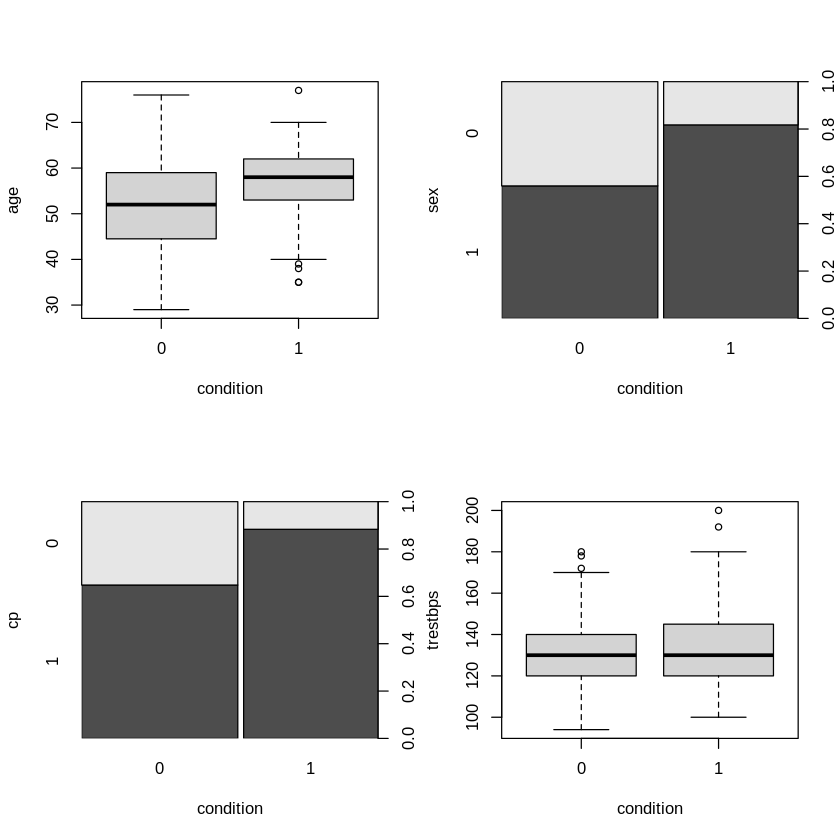

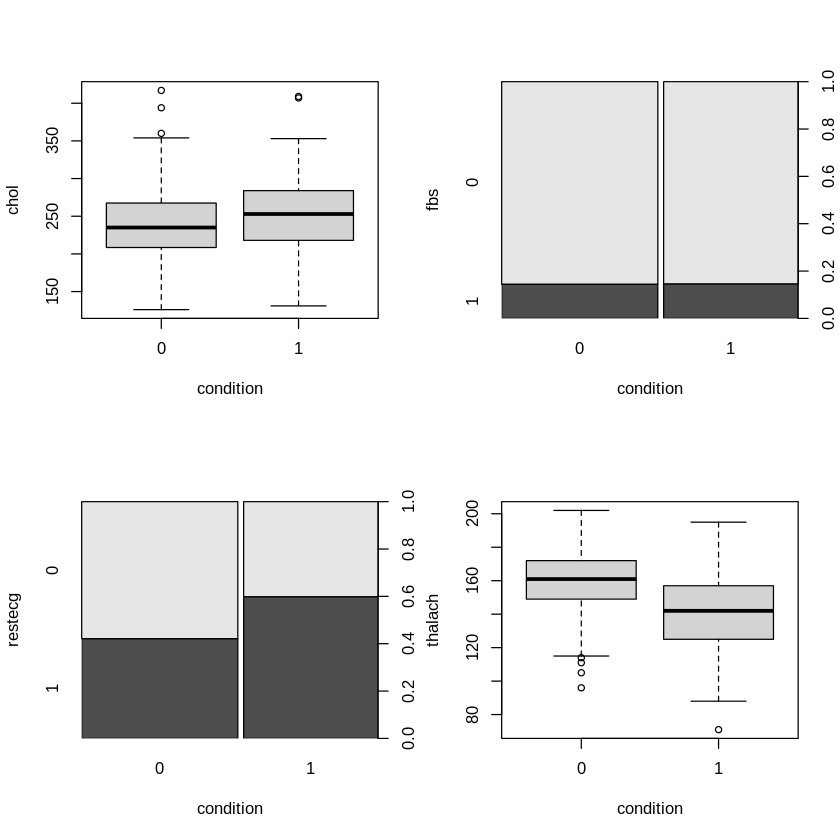

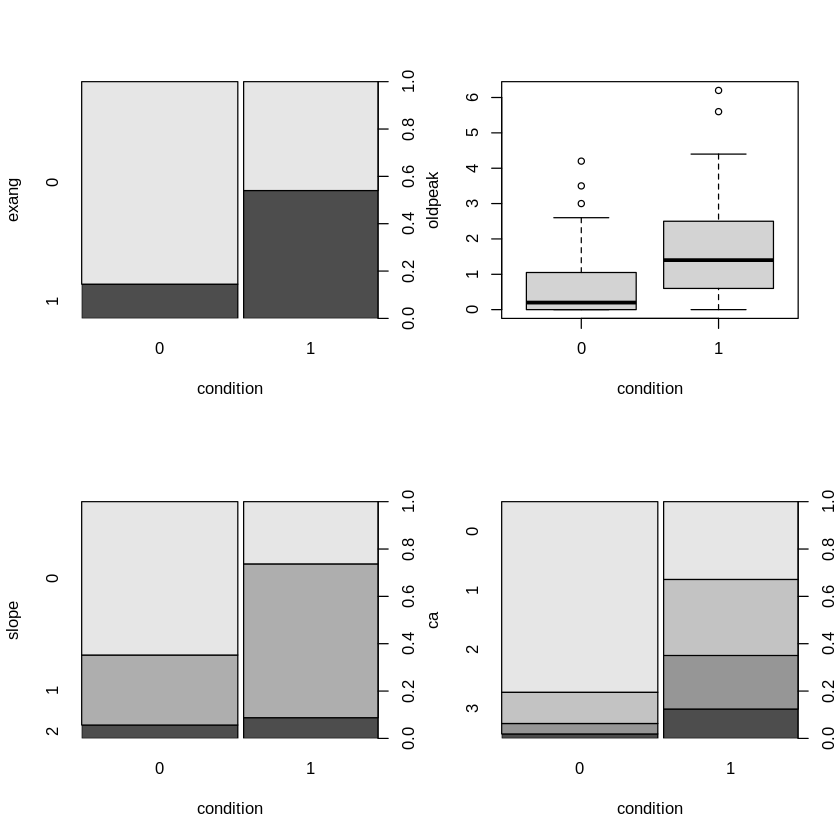

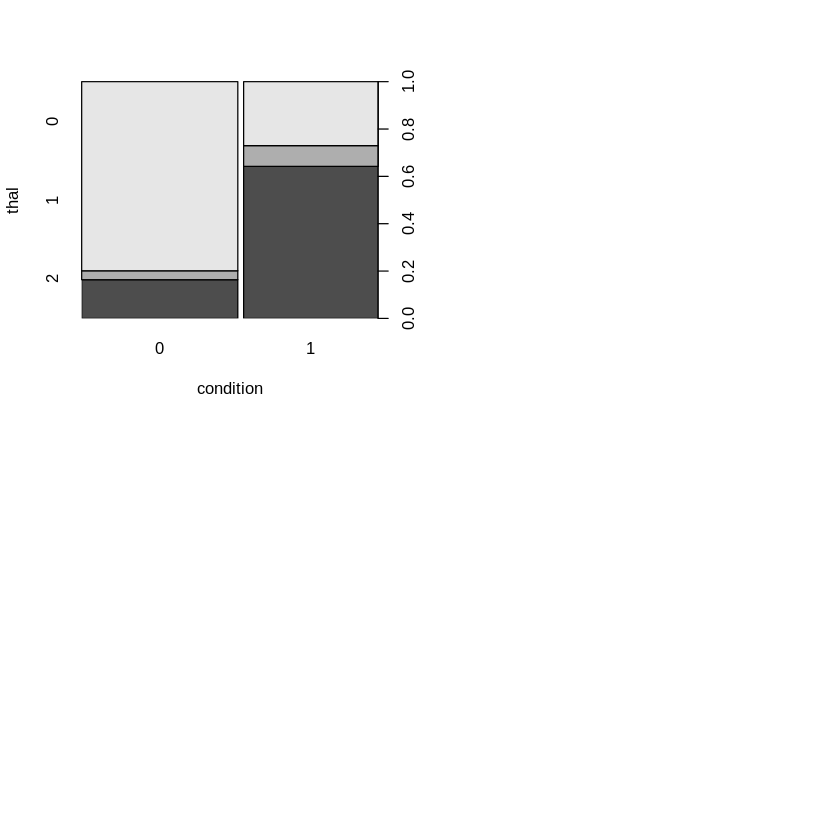

In [7]:
par(mfrow=c(2,2))
for (i in 1:13) {
    plot(heart[,14],heart[,i], xlab = "condition", ylab = colnames(heart)[i])
    }

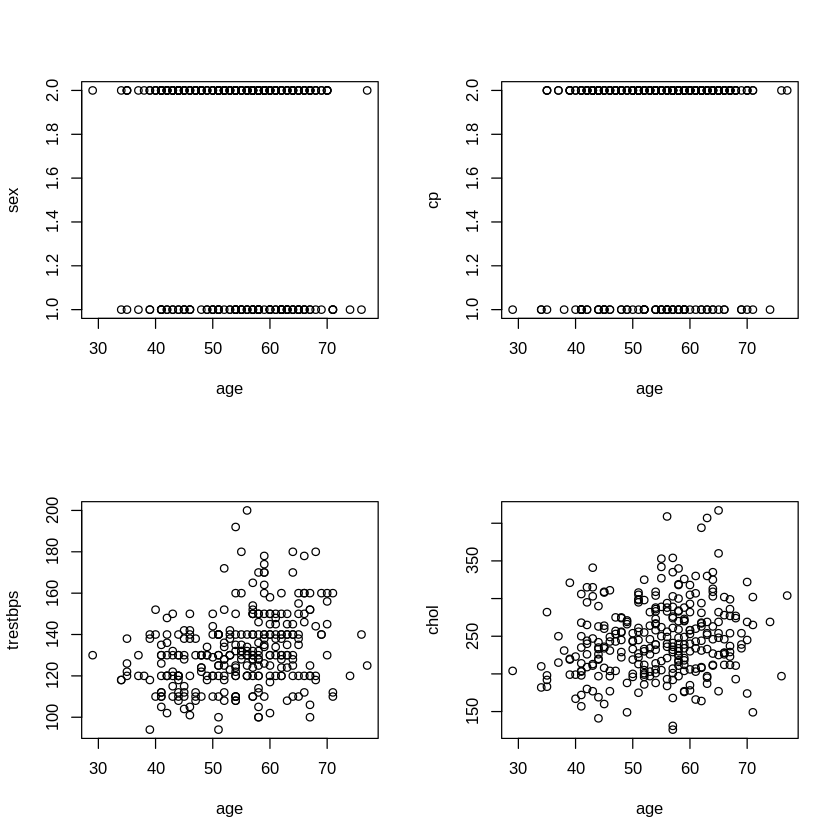

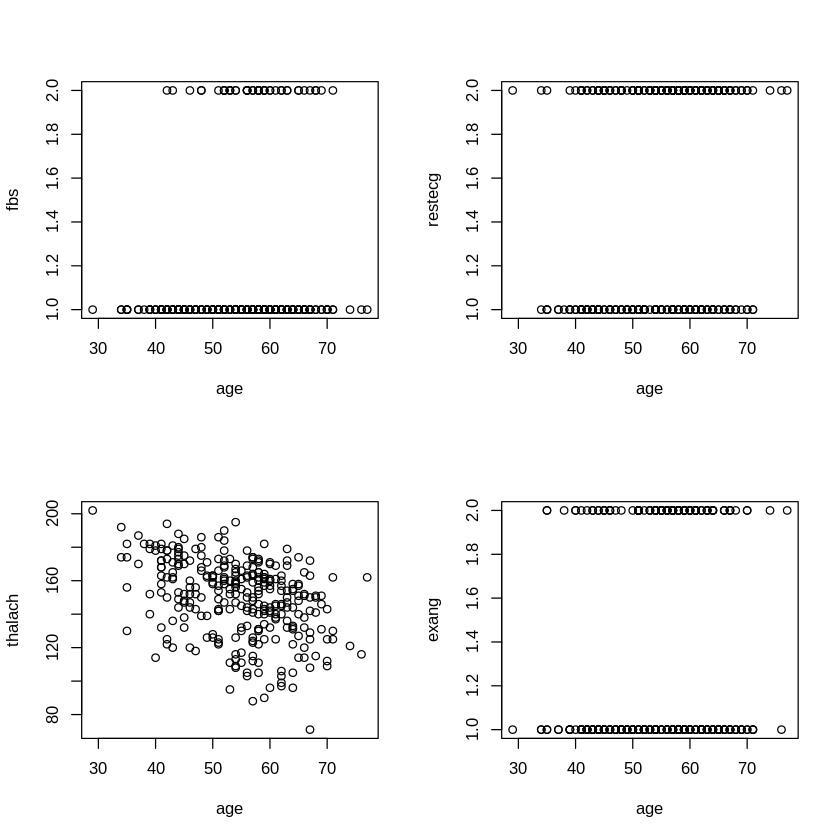

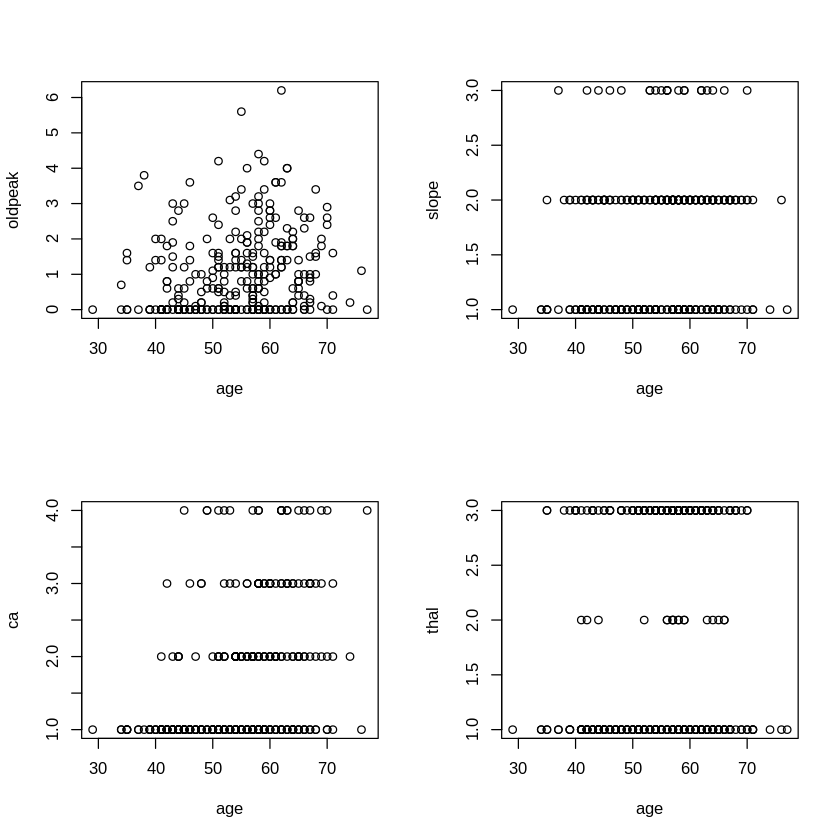

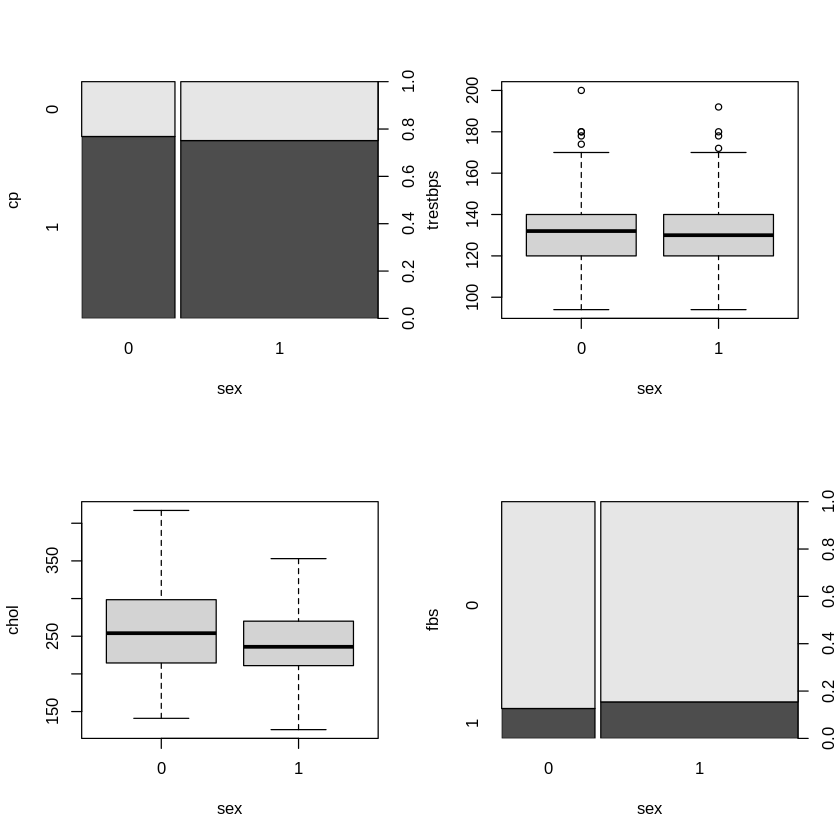

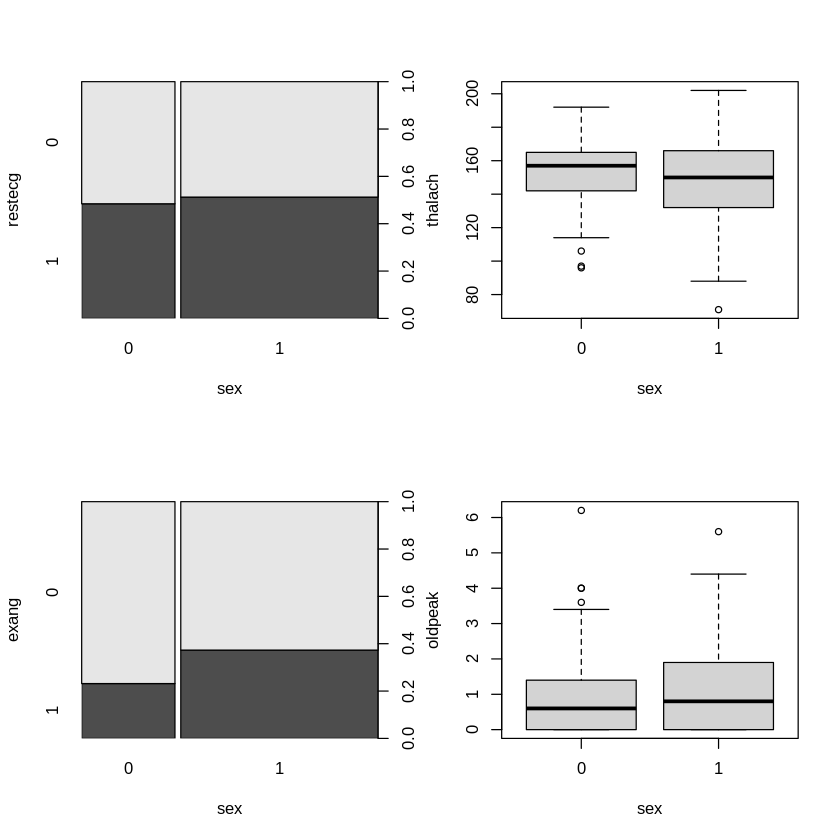

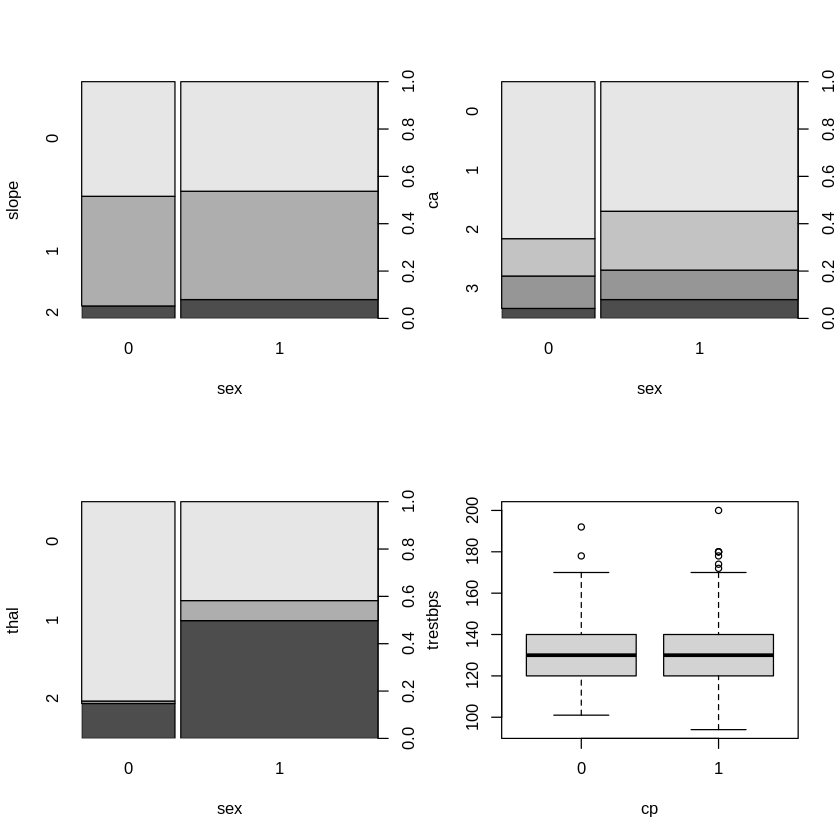

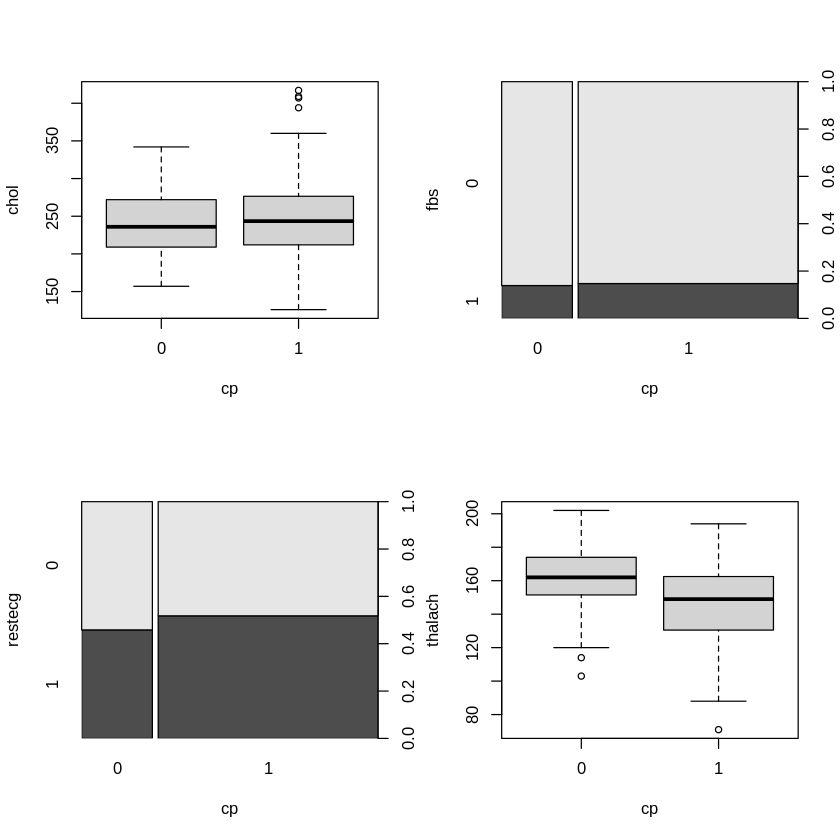

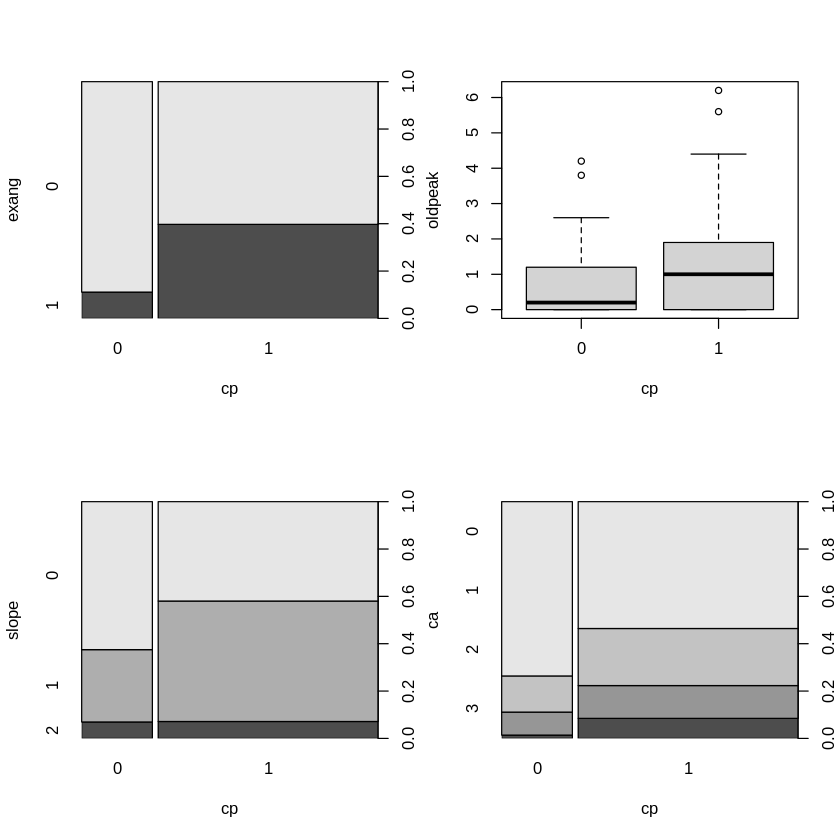

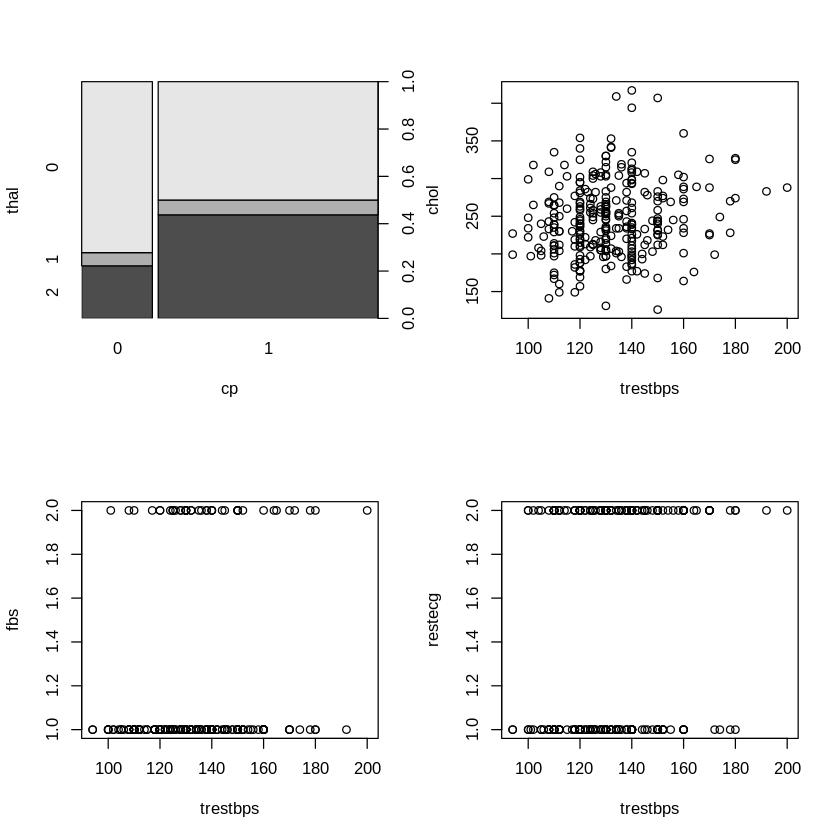

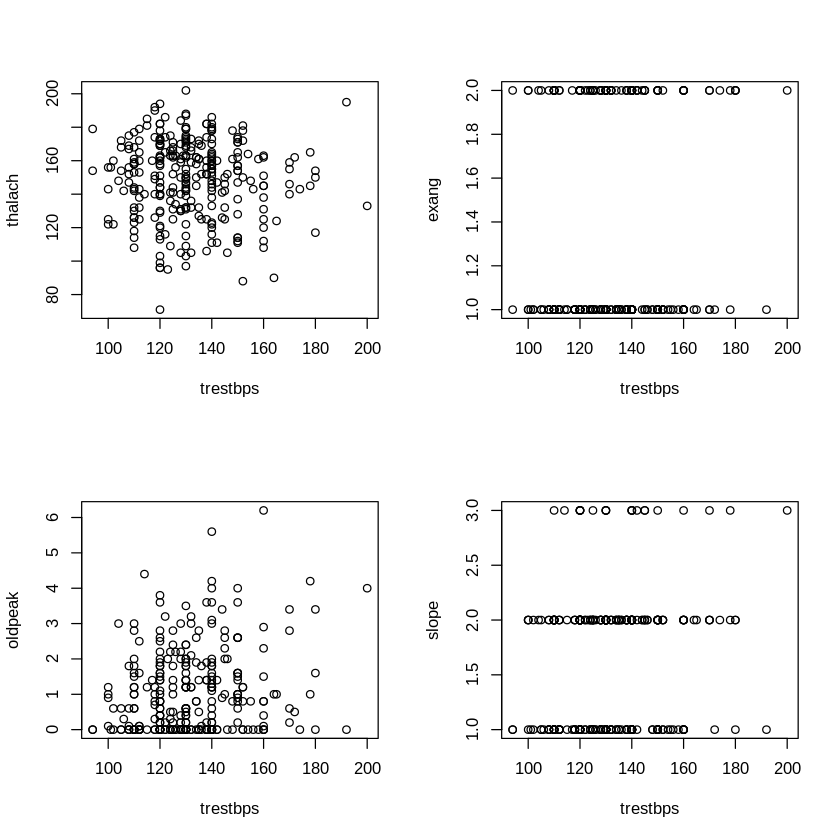

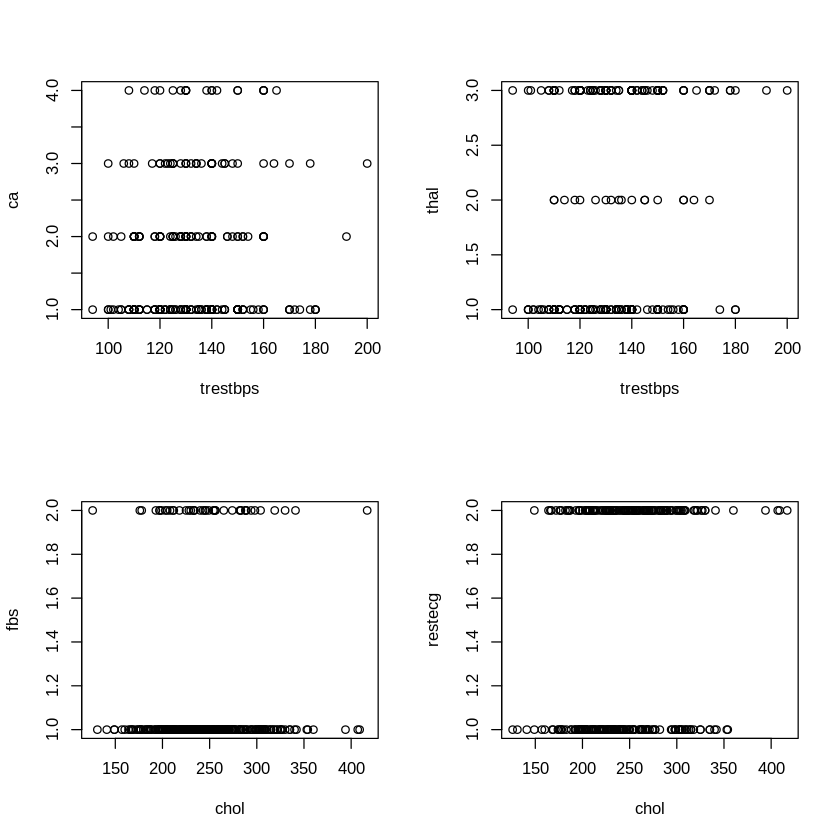

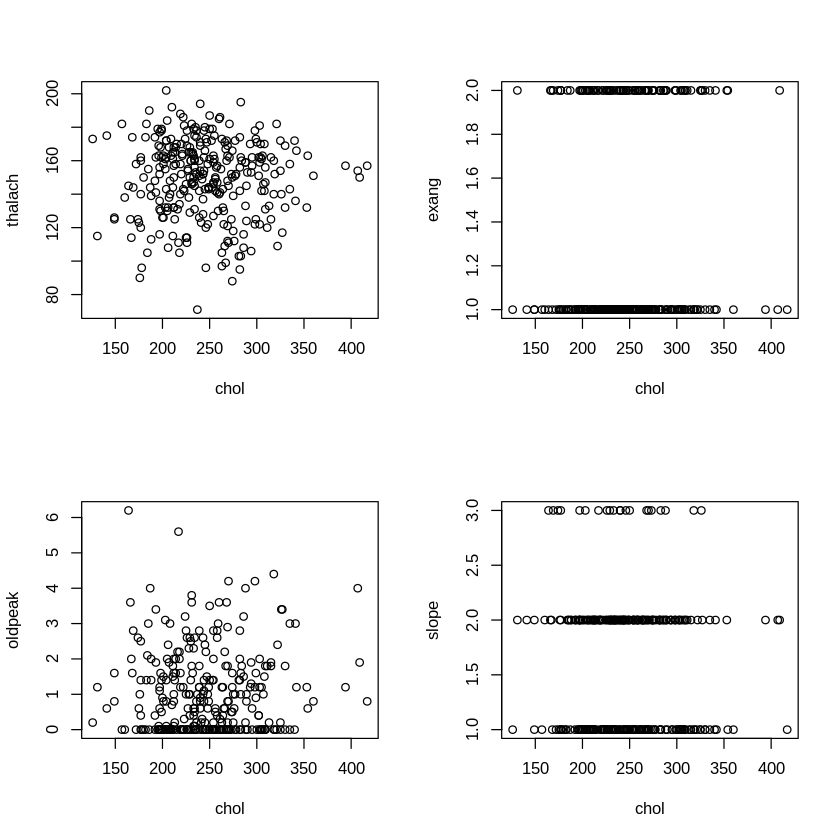

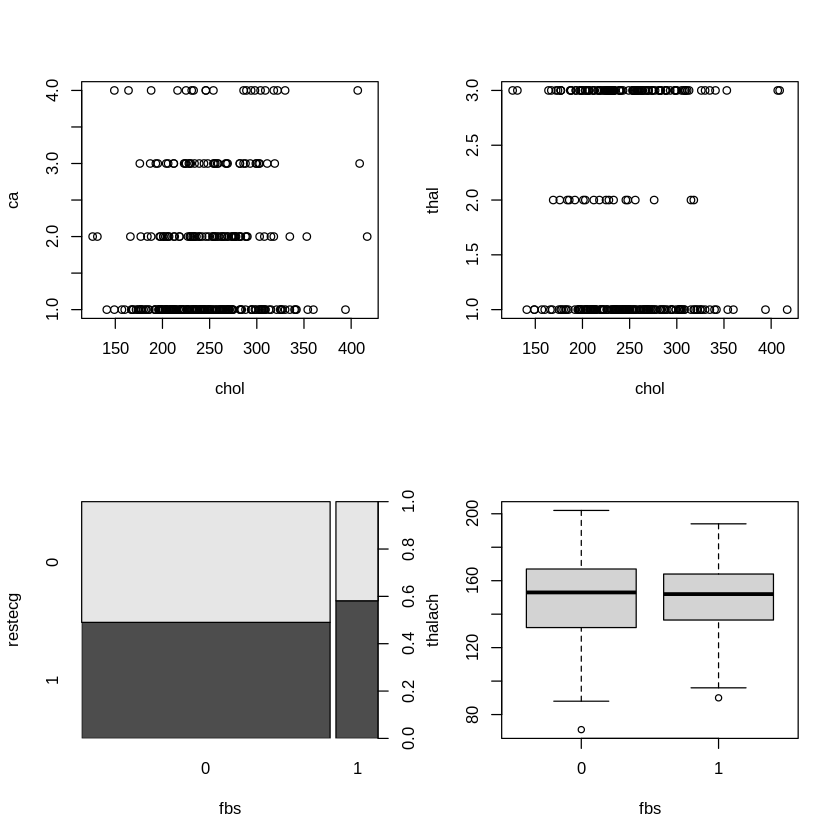

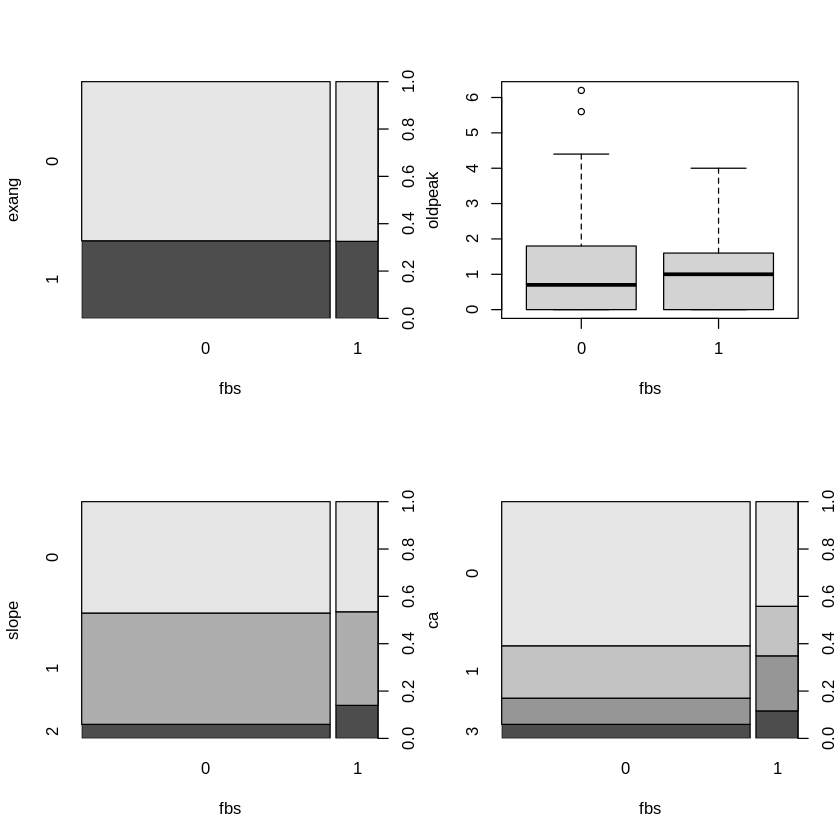

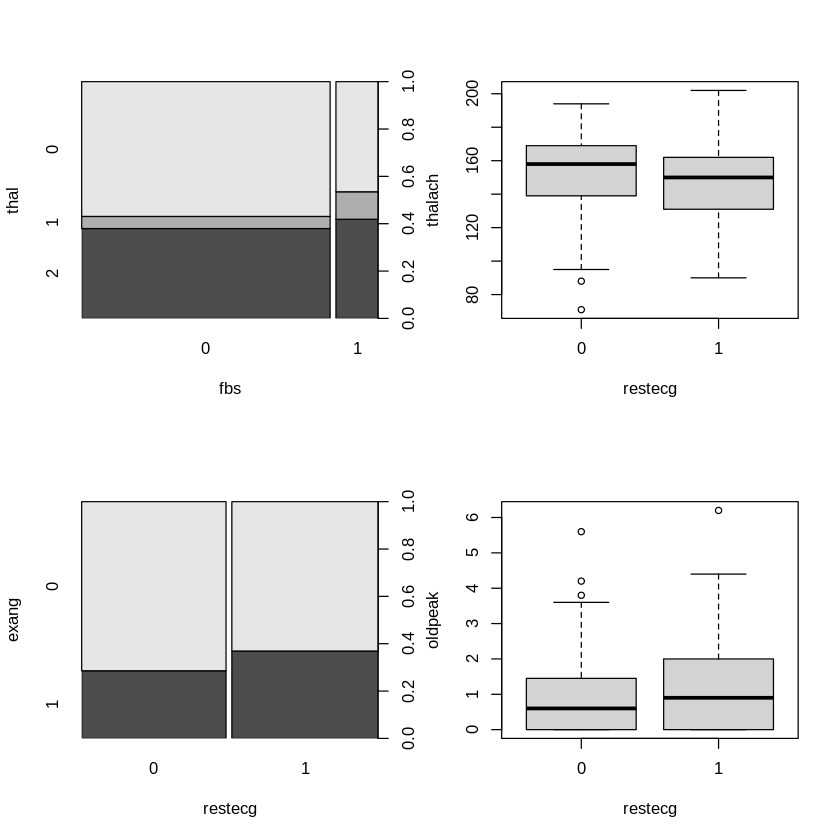

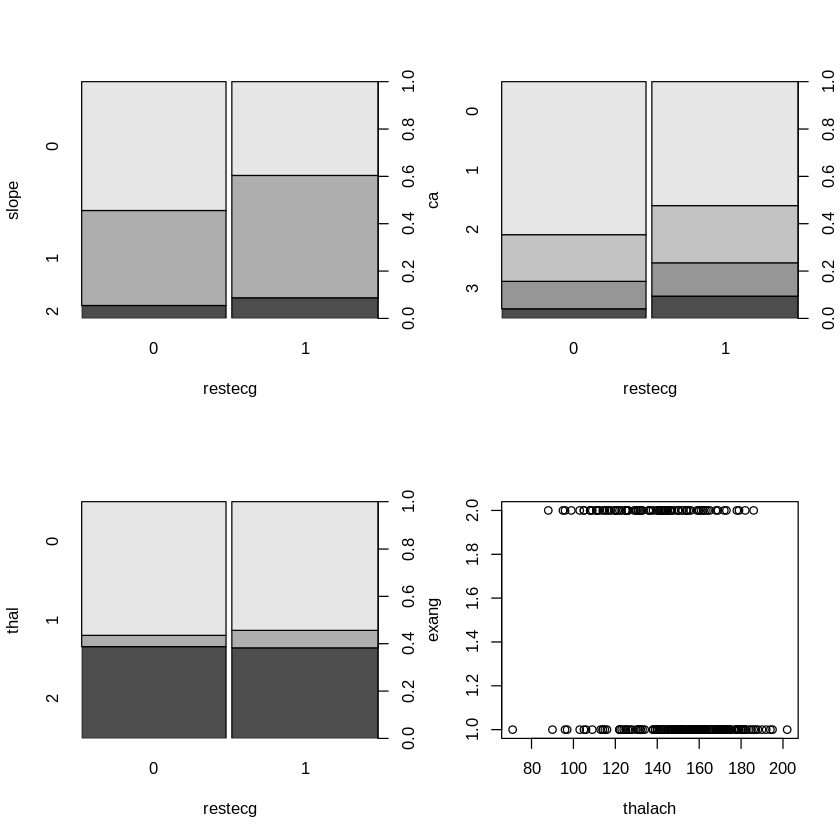

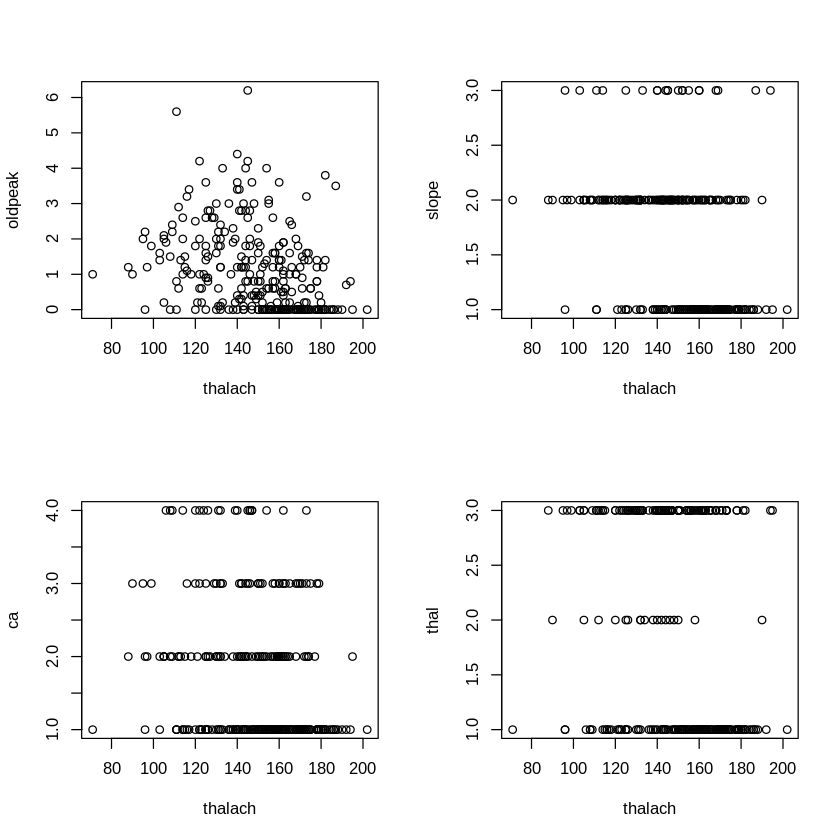

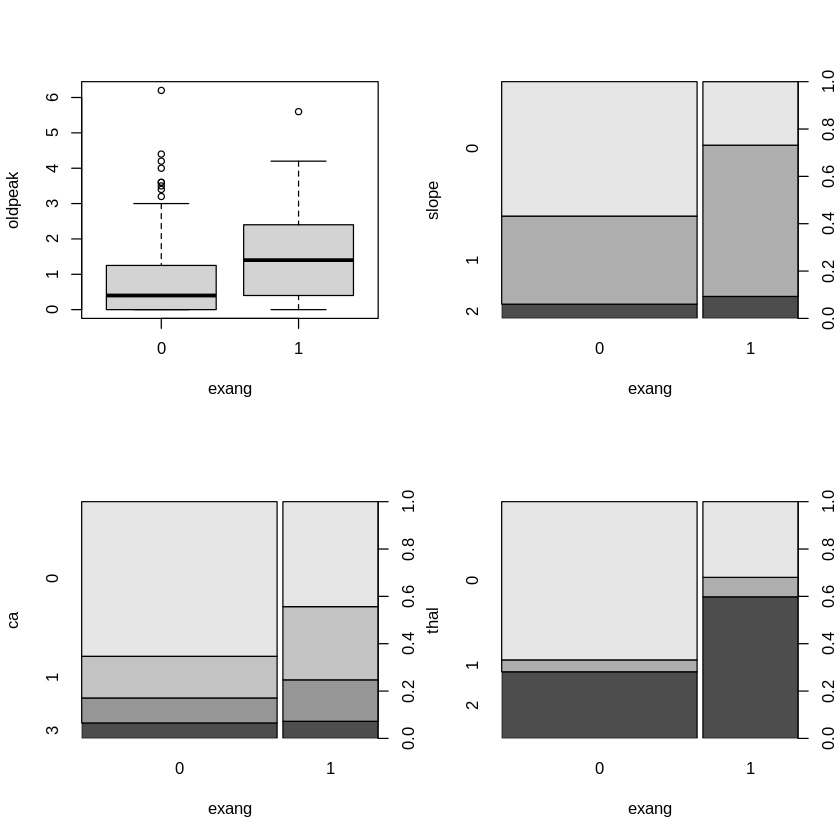

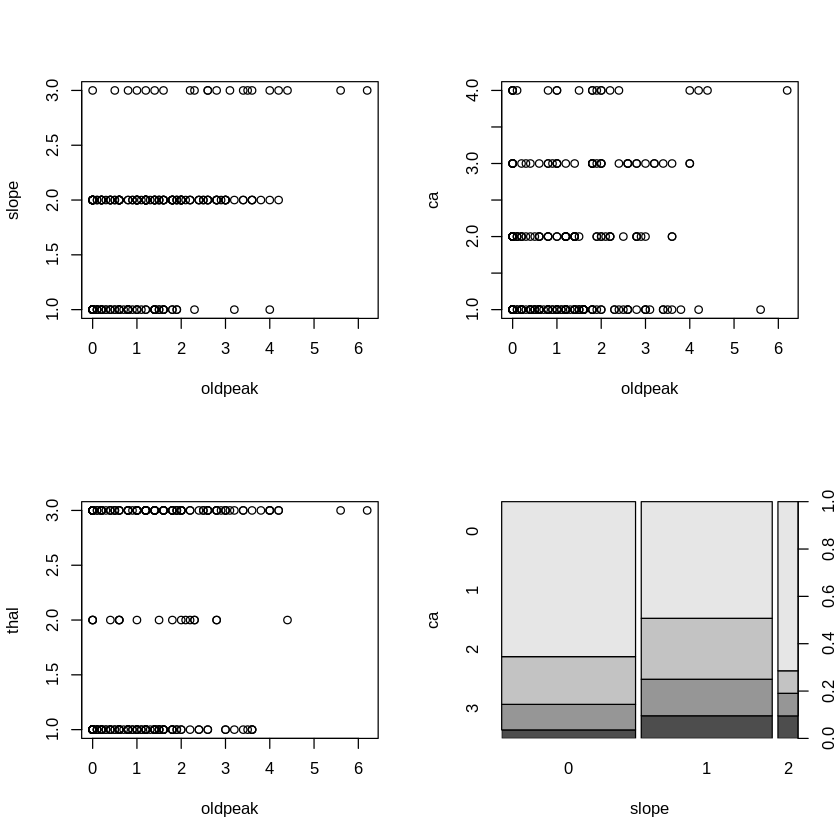

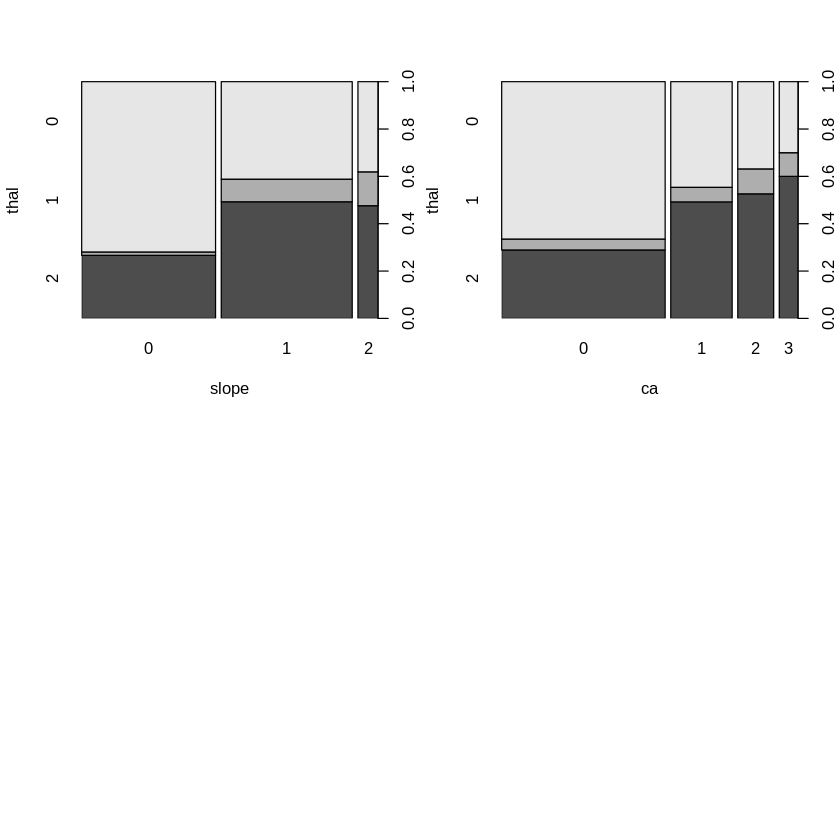

In [8]:
par(mfrow=c(2,2))
for (i in 1:12) {
    for (j in (i+1):13) {
        plot(heart[,i],heart[,j], xlab = colnames(heart)[i], ylab = colnames(heart)[j])
    } }


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

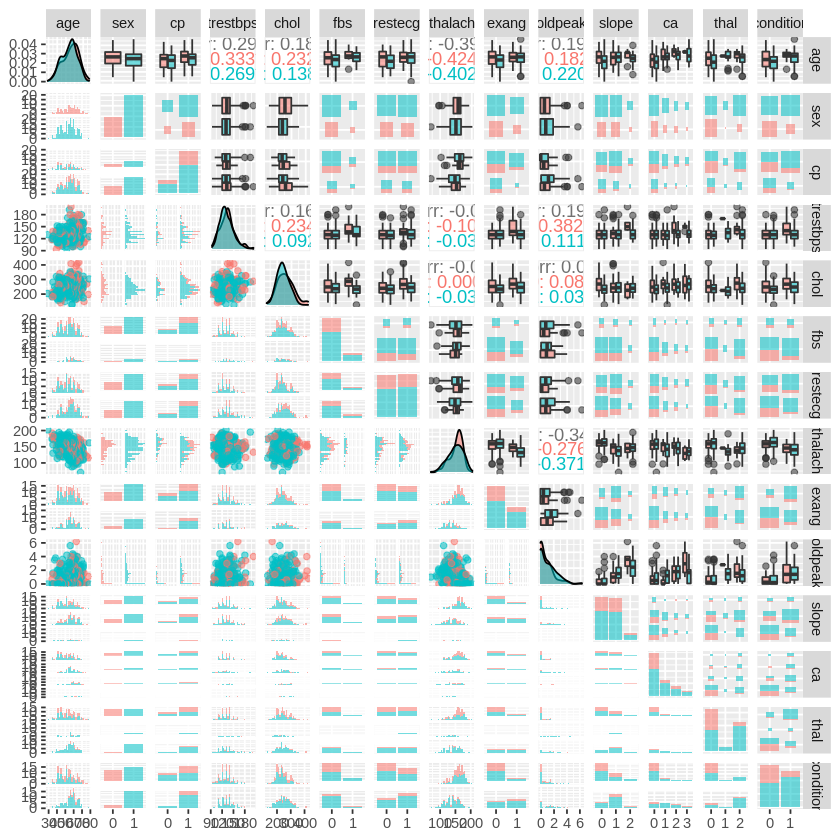

In [9]:
ggpairs(heart, mapping = aes(colour = sex, alpha = 0.5))

In [10]:
round(cor(heart[sapply(heart,is.numeric)]),6)

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.296257,0.186933,-0.398097,0.195645
trestbps,0.296257,1.000000,0.161665,-0.047752,0.193091
chol,0.186933,0.161665,1.000000,-0.010092,0.030981
thalach,-0.398097,-0.047752,-0.010092,1.000000,-0.348608
oldpeak,0.195645,0.193091,0.030981,-0.348608,1.000000


In [11]:
#training set and validation set
set.seed(999)
validation <- sample_frac(heart, 0.2) #leave for final validation
validation_index <- as.numeric(rownames(validation))
train <- heart[-validation_index,]
#cross validation
tr <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

In [12]:
set.seed(80)
fit.glm <- train(condition ~.-cp, data = train, method = "glm", family = binomial, trControl = tr)
summary(fit.glm)


Call:
NULL

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.81215  -0.42467   0.04685   0.37116   2.67045  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.488862   3.183654  -1.096 0.273137    
age         -0.022447   0.027684  -0.811 0.417455    
sex1         1.243801   0.586832   2.120 0.034047 *  
trestbps     0.031330   0.014436   2.170 0.029982 *  
chol         0.003821   0.004866   0.785 0.432279    
fbs1        -1.135711   0.642754  -1.767 0.077238 .  
restecg1     0.685881   0.440161   1.558 0.119174    
thalach     -0.027803   0.013253  -2.098 0.035921 *  
exang1       1.390724   0.468711   2.967 0.003006 ** 
oldpeak      0.432428   0.259567   1.666 0.095722 .  
slope1       0.602247   0.542853   1.109 0.267253    
slope2       0.151565   1.024401   0.148 0.882379    
ca1          1.850810   0.550367   3.363 0.000771 ***
ca2          3.479075   0.949891   3.663 0.000250 ***
ca3          2.213276   0.953963   2.32

In [13]:
#random forest
set.seed(80)
tuneGrid.rf <- expand.grid(mtry = c(2:13))
fit.rf <- train(condition ~., data = train, method = "rf", trControl = tr, tuneGrid = tuneGrid.rf)
fit.rf

Random Forest 

237 samples
 13 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 214, 213, 213, 213, 213, 213, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8322585  0.6647842
   3    0.8195169  0.6396206
   4    0.8151135  0.6309921
   5    0.8082198  0.6171417
   6    0.8053261  0.6114730
   7    0.7997053  0.5999152
   8    0.7981353  0.5970053
   9    0.7966860  0.5941353
  10    0.7940894  0.5886471
  11    0.7983768  0.5973146
  12    0.7955990  0.5921218
  13    0.7898575  0.5802831

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.

In [14]:
fit.rf$bestTune

,mtry
,<int>
1,2


In [15]:
#PCA
train_numeric <- train %>% mutate_if(is.factor, as.numeric)
fit.cr <- princomp(~.-condition, data = train_numeric, cor=TRUE)
summary(fit.cr)
fit.cr$loading

train_cr <- data.frame(fit.cr$scores[,c(1:10)],condition = train$condition)
head(train_cr)

Importance of components:
                         Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     1.800965 1.2508052 1.09063863 1.02248479 1.00478062
Proportion of Variance 0.249498 0.1203472 0.09149943 0.08042117 0.07766031
Cumulative Proportion  0.249498 0.3698452 0.46134463 0.54176579 0.61942611
                           Comp.6     Comp.7    Comp.8     Comp.9    Comp.10
Standard deviation     0.95933334 0.92021161 0.8736013 0.83278035 0.72451773
Proportion of Variance 0.07079388 0.06513765 0.0587061 0.05334793 0.04037892
Cumulative Proportion  0.69021999 0.75535763 0.8140637 0.86741167 0.90779058
                          Comp.11   Comp.12    Comp.13
Standard deviation     0.68577445 0.6309756 0.57472221
Proportion of Variance 0.03617589 0.0306254 0.02540812
Cumulative Proportion  0.94396648 0.9745919 1.00000000


Loadings:
         Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9 Comp.10
age       0.326  0.337  0.105  0.137  0.394                0.223  0.304  0.184 
sex       0.109 -0.537  0.383  0.212 -0.143        -0.218  0.138         0.564 
cp        0.267  0.200         0.115  0.401 -0.109 -0.557  0.148 -0.551 -0.100 
trestbps  0.203  0.300  0.168 -0.500 -0.266 -0.340         0.462  0.206        
chol             0.455         0.393 -0.337 -0.337  0.273 -0.253 -0.292  0.406 
fbs       0.115  0.152  0.580 -0.437               -0.171 -0.594               
restecg   0.168  0.233         0.227 -0.546  0.444 -0.503         0.250        
thalach  -0.371         0.244        -0.320                0.189 -0.468 -0.288 
exang     0.307 -0.192 -0.184  0.108 -0.173 -0.495 -0.191 -0.382  0.209 -0.368 
oldpeak   0.393 -0.120 -0.194 -0.216 -0.181  0.229  0.254  0.126 -0.293        
slope     0.360 -0.119 -0.374 -0.335         0.219        -0.159 -0.232  0.164 
ca        0.310         0.355

,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,condition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
60,-2.952795,-1.8535123,0.9932007,0.1766530,-1.716599,-0.6012806,2.4019096,-0.1380356,1.209072,0.5444203,0
61,-3.499515,-0.8765499,0.5861785,-0.2307141,-2.701086,0.9683737,0.9277495,0.1553380,1.971316,0.3711965,0
62,-3.663981,-1.5766852,0.4080113,-0.3410478,-1.215664,0.2723616,1.9502341,-0.4041408,1.708685,0.7687595,0
63,-3.462003,-1.0079814,0.2700594,0.2316328,-1.690529,-0.2312834,2.3535554,-0.8913072,1.370856,1.4277808,0
64,-2.093946,-2.2614255,-0.2026639,-1.2974683,-1.147912,0.1563740,2.0958739,-0.3362472,2.170958,1.0769850,0
65,-3.156315,-0.1769603,-0.6535646,-1.0525492,-2.414251,1.3075857,1.6149862,-0.1207124,2.007102,-0.7687529,0


In [16]:
#PCA + random forest on training set
set.seed(80)
tuneGrid.rf <- expand.grid(mtry = c(2:13))
fit.rf.pca <- train(condition ~., data = train_cr, method = "rf", trControl = tr, tuneGrid = tuneGrid.rf)
fit.rf.pca

Random Forest 

237 samples
 10 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 214, 213, 213, 213, 213, 213, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8521957  0.7043961
   3    0.8465193  0.6930142
   4    0.8465193  0.6932499
   5    0.8537053  0.7074328
   6    0.8564831  0.7131617
   7    0.8565435  0.7132361
   8    0.8467005  0.6936020
   9    0.8480290  0.6962023
  10    0.8451908  0.6906984
  11    0.8481498  0.6966666
  12    0.8466401  0.6935912
  13    0.8465797  0.6934318

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 7.

In [17]:
##PCA + random forest on validation set
pred.rf <- predict(fit.rf, newdata=validation)
confusionMatrix(pred.rf, validation$condition)

validation_numeric <- validation %>% mutate_if(is.factor, as.numeric)
validation_numeric$condition <- NULL
validation_numeric
pred_pca <- predict(fit.cr, newdata = validation_numeric)
val_pca <- data.frame(pred_pca[,c(1:10)], condition = validation$condition)

pred.rf.pca <- predict(fit.rf.pca, newdata=val_pca)
confusionMatrix(pred.rf.pca, validation$condition)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 36  1
         1  1 21
                                          
               Accuracy : 0.9661          
                 95% CI : (0.8829, 0.9959)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : 7.087e-10       
                                          
                  Kappa : 0.9275          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9730          
            Specificity : 0.9545          
         Pos Pred Value : 0.9730          
         Neg Pred Value : 0.9545          
             Prevalence : 0.6271          
         Detection Rate : 0.6102          
   Detection Prevalence : 0.6271          
      Balanced Accuracy : 0.9638          
                                          
       'Positive' Class : 0               
                                    

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
44,2,1,130,219,1,2,188,1,0.0,1,1,1
34,1,1,118,210,1,1,192,1,0.7,1,1,1
43,1,2,122,213,1,1,165,1,0.2,2,1,1
62,1,2,160,164,1,2,145,1,6.2,3,4,3
59,2,1,178,270,1,2,145,1,4.2,3,1,3
39,1,2,138,220,1,1,152,1,0.0,2,1,1
44,2,2,120,169,1,1,144,2,2.8,3,1,2
59,2,2,135,234,1,1,161,1,0.5,2,1,3
41,2,1,120,157,1,1,182,1,0.0,1,1,1


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 36  0
         1  1 22
                                          
               Accuracy : 0.9831          
                 95% CI : (0.9091, 0.9996)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : 3.989e-11       
                                          
                  Kappa : 0.9641          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9730          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9565          
             Prevalence : 0.6271          
         Detection Rate : 0.6102          
   Detection Prevalence : 0.6102          
      Balanced Accuracy : 0.9865          
                                          
       'Positive' Class : 0               
                                    

In [18]:
#Support Vector Machine
train$sex <- as.numeric(train$sex)
train$cp <- as.numeric(train$cp)
train$fbs <- as.numeric(train$fbs)
train$restecg <- as.numeric(train$restecg)
train$exang <- as.numeric(train$exang)
train$slope <- as.numeric(train$slope)
train$thal <- as.numeric(train$thal)
train$ca <- as.numeric(train$ca)
train$condition <- as.factor(train$condition)
svm.scale_train <-data.frame(train)
if(!require("caret")) {install.packages("caret")}
library(caret)
if(!require("e1071")) {install.packages("e1071")}
library('e1071')
set.seed(1)
# this is not the best.
# fit.tuned<-tune(svm, condition~.,data = svm.scale_train, kernel="radial", 
#                 ranges=list(cost=c(.001, .01,0.1,1,10,100,1000),gamma=c(0.01,0.1, 0.25, 0.5,1,2,3,4)),trControl = tr,cor=TRUE)
# fit.tuned$best.parameters

# fit.tuned<-tune(svm, condition~.,data = svm.scale_train, kernel="linear", 
#                 ranges = cost=c(.001, .01,0.1,1,10,100,1000) ,trControl = tr,cor=TRUE)
# fit.tuned$best.parameters

fit.tuned<-tune(svm, condition~.,data = svm.scale_train, kernel="polynomial",
                ranges=list(cost=c(.001, .01,0.1,1,10,100,1000),degree=c(1,2,3,4,5,6,7,8,9,10)),trControl = tr,type = "C-classification")
fit.tuned$best.parameters


Loading required package: e1071



,cost,degree
,<dbl>,<dbl>
18,1,3


In [19]:
#fit SVM in validation set with polynomial kernel
fit.svm.model<-svm(condition~.,data = svm.scale_train, kernel="polynomial",cost =0.1
                   ,trControl = tr, scale=TRUE,type = "C-classification")
summary(fit.svm.model)

validation$sex <- as.numeric(validation$sex)
validation$cp <- as.numeric(validation$cp)
validation$fbs <- as.numeric(validation$fbs)
validation$restecg <- as.numeric(validation$restecg)
validation$exang <- as.numeric(validation$exang)
validation$slope <- as.numeric(validation$slope)
validation$thal <- as.numeric(validation$thal)
validation$ca <- as.numeric(validation$ca)
validation$condition <- as.factor(validation$condition)
svm.scale_validation <-data.frame(validation)
predict.svm<-predict(fit.svm.model, svm.scale_validation)
mean(predict.svm==svm.scale_validation$condition)



Call:
svm(formula = condition ~ ., data = svm.scale_train, kernel = "polynomial", 
    cost = 0.1, trControl = tr, type = "C-classification", scale = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  0.1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  208

 ( 104 104 )


Number of Classes:  2 

Levels: 
 0 1




[1] 0.9322034

In [20]:
#fit SVM in training set with linear kernel
predict.svm<-predict(fit.svm.model, svm.scale_train)
mean(predict.svm==svm.scale_train$condition)
#fit SVM in training set with polynomial kernel
fit.svm.model.poly<-svm(condition~.,data = svm.scale_train, kernel="polynomial",cost =1,degree = 3
                   ,trControl = tr, scale=TRUE,type = "C-classification")
predict.svm.poly<-predict(fit.svm.model.poly, svm.scale_train)
mean(predict.svm.poly==svm.scale_train$condition)
#fit SVM in training set with radial kernel
fit.svm.model.rad<-svm(condition~.,data = svm.scale_train, kernel="radial",cost =1,gamma = 0.01
                   ,trControl = tr, scale=TRUE,type = "C-classification")
predict.svm.rad<-predict(fit.svm.model.rad, svm.scale_train)
mean(predict.svm.rad==svm.scale_train$condition)

[1] 0.8902954

[1] 0.9240506

[1] 0.8734177

In [21]:
#fit SVM in validation set with linear kernel
predict.svm<-predict(fit.svm.model, svm.scale_validation)
mean(predict.svm==svm.scale_validation$condition)
#fit SVM in validation set with polynomial kernel
predict.svm.poly<-predict(fit.svm.model.poly, svm.scale_validation)
mean(predict.svm.poly==svm.scale_validation$condition)
#fit SVM in validation set with radial kernel
predict.svm.rad<-predict(fit.svm.model.rad, svm.scale_validation)
mean(predict.svm.poly==svm.scale_validation$condition)

[1] 0.9322034

[1] 0.9322034

[1] 0.9322034

In [22]:
confusionMatrix(predict.svm.poly, svm.scale_validation$condition)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 34  1
         1  3 21
                                          
               Accuracy : 0.9322          
                 95% CI : (0.8354, 0.9812)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : 7.116e-08       
                                          
                  Kappa : 0.8577          
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.9189          
            Specificity : 0.9545          
         Pos Pred Value : 0.9714          
         Neg Pred Value : 0.8750          
             Prevalence : 0.6271          
         Detection Rate : 0.5763          
   Detection Prevalence : 0.5932          
      Balanced Accuracy : 0.9367          
                                          
       'Positive' Class : 0               
                                    

In [23]:
library('tidyverse')
library('ISLR2')
library('MASS')
library('caret')
library('GGally')
library('pROC')
library('e1071')
library('neuralnet')
library('leaps')

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




In [24]:
set.seed(999)
validation <- sample_frac(heart, 0.2) #leave for final validation
validation_index <- as.numeric(rownames(validation))
train <- heart[-validation_index,]

tr <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

In [25]:
fit.lr <- glm(condition ~., data = train, family=binomial)
summary(fit.lr)
     


Call:
glm(formula = condition ~ ., family = binomial, data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.79545  -0.42651   0.04827   0.36087   2.65444  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.816e+01  1.009e+03  -0.018 0.985647    
age         -2.938e-02  2.834e-02  -1.037 0.299925    
sex1         1.246e+00  5.871e-01   2.123 0.033771 *  
cp1          1.516e+01  1.009e+03   0.015 0.988014    
trestbps     3.156e-02  1.444e-02   2.186 0.028814 *  
chol         3.894e-03  4.902e-03   0.794 0.426968    
fbs1        -1.167e+00  6.383e-01  -1.828 0.067527 .  
restecg1     6.396e-01  4.414e-01   1.449 0.147355    
thalach     -2.801e-02  1.326e-02  -2.112 0.034653 *  
exang1       1.320e+00  4.671e-01   2.826 0.004718 ** 
oldpeak      3.811e-01  2.625e-01   1.452 0.146616    
slope1       6.221e-01  5.443e-01   1.143 0.253104    
slope2       1.696e-01  1.014e+00   0.167 0.867234    
ca1          1.799e+00

In [26]:
fit_best <- regsubsets(condition ~ ., data = train, nvmax = 17) 
fit_best_sum<-summary(fit_best)
fit_best_sum

Subset selection object
Call: regsubsets.formula(condition ~ ., data = train, nvmax = 17)
17 Variables  (and intercept)
         Forced in Forced out
age          FALSE      FALSE
sex1         FALSE      FALSE
cp1          FALSE      FALSE
trestbps     FALSE      FALSE
chol         FALSE      FALSE
fbs1         FALSE      FALSE
restecg1     FALSE      FALSE
thalach      FALSE      FALSE
exang1       FALSE      FALSE
oldpeak      FALSE      FALSE
slope1       FALSE      FALSE
slope2       FALSE      FALSE
ca1          FALSE      FALSE
ca2          FALSE      FALSE
ca3          FALSE      FALSE
thal1        FALSE      FALSE
thal2        FALSE      FALSE
1 subsets of each size up to 17
Selection Algorithm: exhaustive
          age sex1 cp1 trestbps chol fbs1 restecg1 thalach exang1 oldpeak
1  ( 1 )  " " " "  " " " "      " "  " "  " "      " "     " "    " "    
2  ( 1 )  " " " "  " " " "      " "  " "  " "      "*"     " "    " "    
3  ( 1 )  " " " "  " " " "      " "  " "  " "      "*"

In [27]:
fit_fwd <-regsubsets(condition ~ ., data = train, nvmax = 17, method = "forward")
fit_fwd_sum <- summary(fit_fwd) 
fit_fwd_sum

Subset selection object
Call: regsubsets.formula(condition ~ ., data = train, nvmax = 17, method = "forward")
17 Variables  (and intercept)
         Forced in Forced out
age          FALSE      FALSE
sex1         FALSE      FALSE
cp1          FALSE      FALSE
trestbps     FALSE      FALSE
chol         FALSE      FALSE
fbs1         FALSE      FALSE
restecg1     FALSE      FALSE
thalach      FALSE      FALSE
exang1       FALSE      FALSE
oldpeak      FALSE      FALSE
slope1       FALSE      FALSE
slope2       FALSE      FALSE
ca1          FALSE      FALSE
ca2          FALSE      FALSE
ca3          FALSE      FALSE
thal1        FALSE      FALSE
thal2        FALSE      FALSE
1 subsets of each size up to 17
Selection Algorithm: forward
          age sex1 cp1 trestbps chol fbs1 restecg1 thalach exang1 oldpeak
1  ( 1 )  " " " "  " " " "      " "  " "  " "      " "     " "    " "    
2  ( 1 )  " " " "  " " " "      " "  " "  " "      "*"     " "    " "    
3  ( 1 )  " " " "  " " " "      " "  

In [28]:
fit_bwd <- regsubsets(condition ~ ., data = train, nvmax = 17, method = "backward") 
fit_bwd_sum <- summary(fit_bwd) 
fit_bwd_sum

Subset selection object
Call: regsubsets.formula(condition ~ ., data = train, nvmax = 17, method = "backward")
17 Variables  (and intercept)
         Forced in Forced out
age          FALSE      FALSE
sex1         FALSE      FALSE
cp1          FALSE      FALSE
trestbps     FALSE      FALSE
chol         FALSE      FALSE
fbs1         FALSE      FALSE
restecg1     FALSE      FALSE
thalach      FALSE      FALSE
exang1       FALSE      FALSE
oldpeak      FALSE      FALSE
slope1       FALSE      FALSE
slope2       FALSE      FALSE
ca1          FALSE      FALSE
ca2          FALSE      FALSE
ca3          FALSE      FALSE
thal1        FALSE      FALSE
thal2        FALSE      FALSE
1 subsets of each size up to 17
Selection Algorithm: backward
          age sex1 cp1 trestbps chol fbs1 restecg1 thalach exang1 oldpeak
1  ( 1 )  " " " "  " " " "      " "  " "  " "      " "     " "    " "    
2  ( 1 )  " " " "  " " " "      " "  " "  " "      " "     " "    "*"    
3  ( 1 )  " " " "  " " " "      " "

In [29]:

results= data.frame( 
    "Cp" = c(which.min(summary(fit_best)$cp),which.min(summary(fit_fwd)$cp),
                             which.min(summary(fit_bwd)$cp)),
    "bic"= c(which.min(summary(fit_best)$bic),which.min(summary(fit_fwd)$bic),
                             which.min(summary(fit_bwd)$bic)), 
    "adjr2" = c(which.max(summary(fit_best)$adjr2),which.max(summary(fit_fwd)$adjr2),
                             which.max(summary(fit_bwd)$adjr2))
)

x=c("Best Subset selection", "Forward Stepwise","Backward Stepwise")

row.names(results) = x

results

,Cp,bic,adjr2
,<int>,<int>,<int>
Best Subset selection,12,7,13
Forward Stepwise,13,7,13
Backward Stepwise,12,7,13


In [30]:
fit.lr_fit <- glm(condition ~ .-cp-age-chol-slope, data = train, family=binomial)
summary(fit.lr_fit)


Call:
glm(formula = condition ~ . - cp - age - chol - slope, family = binomial, 
    data = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.71464  -0.43177   0.04957   0.36028   2.60522  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.89225    2.34425  -1.234 0.217290    
sex1         1.06938    0.54182   1.974 0.048417 *  
trestbps     0.02784    0.01343   2.073 0.038174 *  
fbs1        -1.08351    0.62205  -1.742 0.081537 .  
restecg1     0.74151    0.42751   1.734 0.082830 .  
thalach     -0.02857    0.01151  -2.483 0.013029 *  
exang1       1.47138    0.46055   3.195 0.001399 ** 
oldpeak      0.53176    0.23019   2.310 0.020883 *  
ca1          1.72450    0.52145   3.307 0.000943 ***
ca2          3.22623    0.86825   3.716 0.000203 ***
ca3          2.00196    0.91264   2.194 0.028266 *  
thal1        0.34509    0.86554   0.399 0.690110    
thal2        1.61580    0.48018   3.365 0.000765 ***
---
Signif. codes: 

In [31]:

pred_lr_fit <-predict(fit.lr_fit, newdata = validation, type="response")
predict_labels_fit = ifelse(pred_lr_fit > 0.5, "1", "0") 
predict_labels_fit=as.factor(predict_labels_fit)
head(predict_labels_fit)
confusionMatrix(predict_labels_fit, validation$condition, positive="1")

1 2 3 4 5 6 
0 0 0 1 1 0 
Levels: 0 1

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 34  1
         1  3 21
                                          
               Accuracy : 0.9322          
                 95% CI : (0.8354, 0.9812)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : 7.116e-08       
                                          
                  Kappa : 0.8577          
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.9545          
            Specificity : 0.9189          
         Pos Pred Value : 0.8750          
         Neg Pred Value : 0.9714          
             Prevalence : 0.3729          
         Detection Rate : 0.3559          
   Detection Prevalence : 0.4068          
      Balanced Accuracy : 0.9367          
                                          
       'Positive' Class : 1               
                                    

Setting levels: control = 0, case = 1

Setting direction: controls < cases



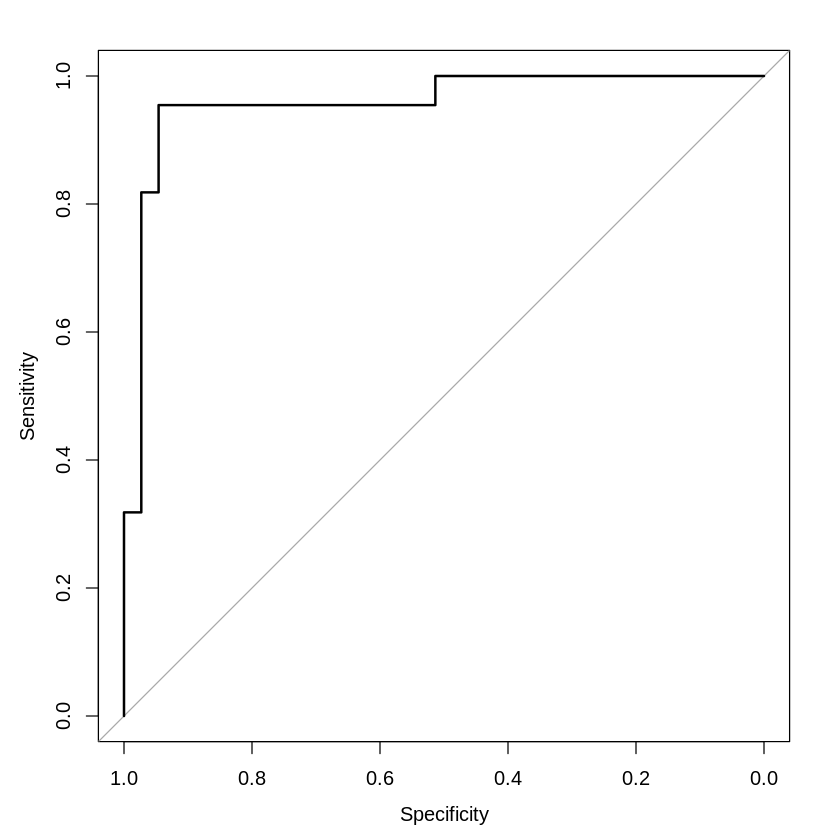

In [32]:
ROC_lr_fit <- roc(validation$condition, pred_lr_fit)
plot(ROC_lr_fit)

In [33]:

nb_model <- naiveBayes(condition ~ ., data = train, trControl = tr)
nb_pred <- predict(nb_model, validation)
#mse
mean((as.numeric(validation$condition) - as.numeric(nb_pred))^2)
#confusion matrix
confusionMatrix(nb_pred, validation$condition)

[1] 0.1016949

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 32  1
         1  5 21
                                          
               Accuracy : 0.8983          
                 95% CI : (0.7917, 0.9618)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : 2.684e-06       
                                          
                  Kappa : 0.7903          
                                          
 Mcnemar's Test P-Value : 0.2207          
                                          
            Sensitivity : 0.8649          
            Specificity : 0.9545          
         Pos Pred Value : 0.9697          
         Neg Pred Value : 0.8077          
             Prevalence : 0.6271          
         Detection Rate : 0.5424          
   Detection Prevalence : 0.5593          
      Balanced Accuracy : 0.9097          
                                          
       'Positive' Class : 0               
                                    

Setting levels: control = 0, case = 1

Setting direction: controls < cases



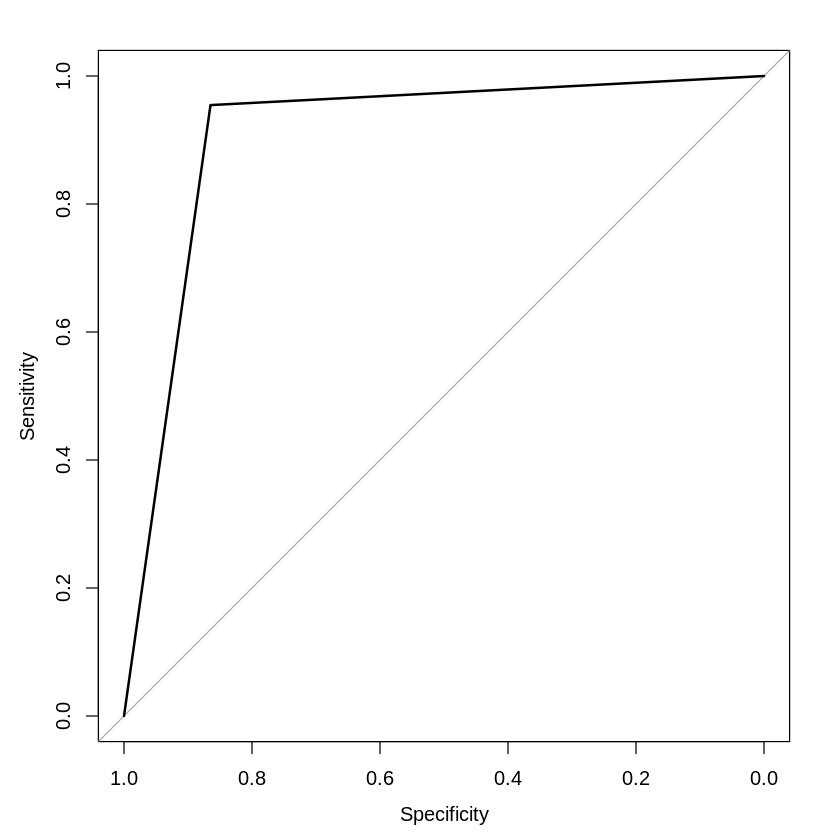

In [34]:
ROC_nb <- roc(validation$condition, as.numeric(nb_pred))
plot(ROC_nb)

In [36]:
#neural net

#scaling
scale.fun <- function(x){
  (x - min(x)) / (max(x) - min(x))
}

train_2 <- train %>% mutate_if(is.integer, scale.fun) 
vali_2<- validation %>% mutate_if(is.integer, scale.fun)

table(train_2$condition)
table(vali_2$condition)
summary(vali_2)
summary(train_2)


  0   1 
116 121 


 0  1 
37 22 

      age         sex    cp        trestbps           chol        fbs   
 Min.   :0.0000   0:20   0:19   Min.   :0.0000   Min.   :0.0000   0:52  
 1st Qu.:0.2619   1:39   1:40   1st Qu.:0.3023   1st Qu.:0.2462   1: 7  
 Median :0.5000                 Median :0.4186   Median :0.4162         
 Mean   :0.4722                 Mean   :0.4484   Mean   :0.4193         
 3rd Qu.:0.6310                 3rd Qu.:0.5349   3rd Qu.:0.5838         
 Max.   :1.0000                 Max.   :1.0000   Max.   :1.0000         
 restecg    thalach       exang     oldpeak      slope  ca     thal   condition
 0:33    Min.   :0.0000   0:39   Min.   :0.000   0:25   0:41   0:33   0:37     
 1:26    1st Qu.:0.4904   1:20   1st Qu.:0.000   1:28   1: 9   1: 4   1:22     
         Median :0.6442          Median :0.600   2: 6   2: 6   2:22            
         Mean   :0.6071          Mean   :1.122          3: 3                   
         3rd Qu.:0.7788          3rd Qu.:1.600                                 
         

      age         sex     cp         trestbps           chol        fbs    
 Min.   :0.0000   0: 77   0: 13   Min.   :0.0000   Min.   :0.0000   0:204  
 1st Qu.:0.3750   1:160   1:224   1st Qu.:0.2453   1st Qu.:0.2921   1: 33  
 Median :0.5417                   Median :0.3396   Median :0.4021          
 Mean   :0.5258                   Mean   :0.3491   Mean   :0.4128          
 3rd Qu.:0.6667                   3rd Qu.:0.4340   3rd Qu.:0.5120          
 Max.   :1.0000                   Max.   :1.0000   Max.   :1.0000          
 restecg    thalach       exang      oldpeak      slope   ca      thal   
 0:118   Min.   :0.0000   0:148   Min.   :0.000   0:106   0:132   0:123  
 1:119   1st Qu.:0.4656   1: 89   1st Qu.:0.000   1:115   1: 55   1: 15  
         Median :0.6031           Median :0.800   2: 16   2: 31   2: 99  
         Mean   :0.5833           Mean   :1.125           3: 19          
         3rd Qu.:0.7023           3rd Qu.:1.800                          
         Max.   :1.0000 

In [37]:

#one-hot
train_dummy <- model.matrix(~ sex + cp + fbs + restecg + slope + ca + thal + condition, train_2)[,-1]
head(train_dummy)
train_cbind <- cbind(train_2, train_dummy)
set.seed(5)
str(train_cbind)
train_cbind <- train_cbind[,c(-2,-3,-6,-7,-9,-11:-15)]
str(train_cbind)

fit.nn <- neuralnet(condition1 ~., data = train_cbind,
                 linear.output = FALSE, err.fct = "ce")

fit.nn$result.matrix

,sex1,cp1,fbs1,restecg1,slope1,slope2,ca1,ca2,ca3,thal1,thal2,condition1
60,1,0,0,0,0,0,0,0,0,0,1,0
61,1,0,0,1,0,0,0,0,0,0,0,0
62,1,0,0,0,0,0,0,0,0,0,0,0
63,1,0,0,0,0,0,0,0,0,0,0,0
64,1,0,0,0,1,0,0,0,0,1,0,0
65,0,0,0,1,0,0,0,0,0,0,0,0


'data.frame':	237 obs. of  26 variables:
 $ age       : num  0.312 0.312 0.312 0.271 0.25 ...
 $ sex       : Factor w/ 2 levels "0","1": 2 2 2 2 2 1 1 2 1 2 ...
 $ cp        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ trestbps  : num  0.245 0.34 0.245 0.245 0.387 ...
 $ chol      : num  0.471 0.32 0.323 0.581 0.265 ...
 $ fbs       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ restecg   : Factor w/ 2 levels "0","1": 1 2 1 1 1 2 1 1 1 1 ...
 $ thalach   : num  0.779 0.893 0.756 0.695 0.466 ...
 $ exang     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ oldpeak   : num  0 0 0 0 0 1.4 0 0 0 0 ...
 $ slope     : Factor w/ 3 levels "0","1","2": 1 1 1 1 2 1 1 1 1 1 ...
 $ ca        : Factor w/ 4 levels "0","1","2","3": 1 1 1 1 1 1 2 1 1 1 ...
 $ thal      : Factor w/ 3 levels "0","1","2": 3 1 1 1 2 1 1 1 1 1 ...
 $ condition : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex1      : num  1 1 1 1 1 0 0 1 0 1 ...
 $ cp1       : num  0 0 0 0 0 0 0 0 0

error,6.936633e+01
reached.threshold,9.884887e-03
steps,7.870000e+03
Intercept.to.1layhid1,1.458193e+00
age.to.1layhid1,6.167111e+01
trestbps.to.1layhid1,-4.590607e+01
chol.to.1layhid1,1.362008e+01
thalach.to.1layhid1,7.970114e+01
oldpeak.to.1layhid1,-2.232416e+00
cp1.to.1layhid1,-2.896019e+01
fbs1.to.1layhid1,1.125713e+01


In [38]:

set.seed(5)
# 2-Hidden Layers: Layer-1 2-neurons, Layer-2, 1-neuron
fit.nn.21 <- neuralnet(condition1 ~.,
                     data = train_cbind, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     hidden = c(2,1))

In [39]:

# 2-Hidden Layers: Layer-1 3-neurons, Layer-2, 1-neuron
fit.nn.31 <- neuralnet(condition1 ~.,
                     data = train_cbind, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     hidden = c(3,1))

In [40]:
# 2-Hidden Layers: Layer-1 3-neurons, Layer-2, 2-neuron
fit.nn.32 <- neuralnet(condition1 ~.,
                     data = train_cbind, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     hidden = c(3,2))

In [41]:
# 2-Hidden Layers: Layer-1 4-neurons, Layer-2, 1-neuron
fit.nn.41 <- neuralnet(condition1 ~.,
                     data = train_cbind, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     hidden = c(4,1))

In [42]:

# 2-Hidden Layers: Layer-1 5-neurons, Layer-2, 1-neuron
fit.nn.51 <- neuralnet(condition1 ~.,
                     data = train_cbind, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     hidden = c(5,1))
     

In [43]:

# 2-Hidden Layers: Layer-1 6-neurons, Layer-2, 1-neuron
fit.nn.61 <- neuralnet(condition1 ~.,
                     data = train_cbind, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     hidden = c(6,1))

In [44]:

# 2-Hidden Layers: Layer-1 5-neurons, Layer-2, 2-neuron
fit.nn.52 <- neuralnet(condition1 ~.,
                     data = train_cbind, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     hidden = c(5,2))

In [45]:
# 2-Hidden Layers: Layer-1 5-neurons, Layer-2, 3-neuron
fit.nn.53 <- neuralnet(condition1 ~.,
                     data = train_cbind, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     hidden = c(5,3))

In [46]:

# 2-Hidden Layers: Layer-1 1-neurons, Layer-2, 3-neuron
fit.nn.13 <- neuralnet(condition1 ~.,
                     data = train_cbind, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     hidden = c(1,3))

Warning message:
“Algorithm did not converge in 1 of 1 repetition(s) within the stepmax.”


In [47]:

# 3-Hidden Layers: Layer-1 2-neurons, Layer-2, 1-neuron, Layer-3, 1-neuron
fit.nn.211 <- neuralnet(condition1 ~.,
                     data = train_cbind, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     hidden = c(2,1,1))

In [48]:
# 3-Hidden Layers: Layer-1 2-neurons, Layer-2, 1-neuron, Layer-3, 2-neuron
fit.nn.212 <- neuralnet(condition1 ~.,
                     data = train_cbind, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     hidden = c(2,1,2))

In [49]:

# 4-Hidden Layers: Layer-1 2-neurons, Layer-2, 1-neuron, Layer-3, 1-neuron, Layer-4, 1-neuron
fit.nn.2111 <- neuralnet(condition1 ~.,
                     data = train_cbind, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     hidden = c(2,1,1,1))

In [50]:

# 2-Hidden Layers, Layer-1 2-neurons, Layer-2, 2-neurons
fit.nn.22 <- neuralnet(condition1 ~., 
                                data = train_cbind, 
                                linear.output = FALSE, 
                                err.fct = 'ce', 
                                hidden = c(2,2))

Warning message:
“Algorithm did not converge in 1 of 1 repetition(s) within the stepmax.”


In [51]:
# 2-Hidden Layers, Layer-1 1-neuron, Layer-2, 2-neuron
fit.nn.12 <- neuralnet(condition1 ~ ., 
                                data = train_cbind, 
                                linear.output = FALSE, 
                                err.fct = 'ce',
                                hidden = c(1,2))

In [52]:
paste("Error with 2-Hidden Layers: Layer-1 2-neurons, Layer-2, 1-neuron is:",  fit.nn.21$result.matrix[1,1])
paste("Error with 2-Hidden Layers: Layer-1 3-neurons, Layer-2, 1-neuron is:",  fit.nn.31$result.matrix[1,1])
paste("Error with 2-Hidden Layers: Layer-1 3-neurons, Layer-2, 2-neurons is:",  fit.nn.32$result.matrix[1,1])
paste("Error with 2-Hidden Layers: Layer-1 4-neurons, Layer-2, 1-neuron is:",  fit.nn.41$result.matrix[1,1])
paste("Error with 2-Hidden Layers: Layer-1 5-neurons, Layer-2, 1-neuron is:",  fit.nn.51$result.matrix[1,1])
paste("Error with 2-Hidden Layers: Layer-1 6-neurons, Layer-2, 1-neuron is:",  fit.nn.61$result.matrix[1,1])
paste("Error with 2-Hidden Layers: Layer-1 5-neurons, Layer-2, 2-neurons is:",  fit.nn.52$result.matrix[1,1])
paste("Error with 2-Hidden Layers: Layer-1 5-neurons, Layer-2, 3-neurons is:",  fit.nn.53$result.matrix[1,1])
paste("Error with 2-Hidden Layers: Layer-1 1-neuron, Layer-2, 3-neurons is:",  fit.nn.13$result.matrix[1,1])
paste("Error with 3-Hidden Layers: Layer-1 2-neurons, Layer-2, 1-neuron, Layer-3, 1-neuron is:",  fit.nn.211$result.matrix[1,1])
paste("Error with 3-Hidden Layers: Layer-1 2-neurons, Layer-2, 1-neuron, Layer-3, 2-neurons is:",  fit.nn.212$result.matrix[1,1])
paste("Error with 4-Hidden Layers: Layer-1 2-neurons, Layer-2, 1-neuron, Layer-3, 1-neuron, Layer-4, 1-neuron is:",  fit.nn.2111$result.matrix[1,1])
paste("Error with 2-Hidden Layers, Layer-1 2-neurons, Layer-2, 2-neurons is:", fit.nn.22$result.matrix[1,1])
paste("Error with 2-Hidden Layers, Layer-1 1-neuron, Layer-2, 2-neurons is:", fit.nn.12$result.matrix[1,1])
     

[1] "Error with 2-Hidden Layers: Layer-1 2-neurons, Layer-2, 1-neuron is: 55.7314950087805"

[1] "Error with 2-Hidden Layers: Layer-1 3-neurons, Layer-2, 1-neuron is: 36.8852752172569"

[1] "Error with 2-Hidden Layers: Layer-1 3-neurons, Layer-2, 2-neurons is: 23.9502025656104"

[1] "Error with 2-Hidden Layers: Layer-1 4-neurons, Layer-2, 1-neuron is: 31.7059033570406"

[1] "Error with 2-Hidden Layers: Layer-1 5-neurons, Layer-2, 1-neuron is: 34.9593092150264"

[1] "Error with 2-Hidden Layers: Layer-1 6-neurons, Layer-2, 1-neuron is: 14.0383816109299"

[1] "Error with 2-Hidden Layers: Layer-1 5-neurons, Layer-2, 2-neurons is: 28.2450944753949"

[1] "Error with 2-Hidden Layers: Layer-1 5-neurons, Layer-2, 3-neurons is: 20.8557329259212"

[1] "Error with 2-Hidden Layers: Layer-1 1-neuron, Layer-2, 3-neurons is: "

[1] "Error with 3-Hidden Layers: Layer-1 2-neurons, Layer-2, 1-neuron, Layer-3, 1-neuron is: 77.6781784296742"

[1] "Error with 3-Hidden Layers: Layer-1 2-neurons, Layer-2, 1-neuron, Layer-3, 2-neurons is: 67.3979547906016"

[1] "Error with 4-Hidden Layers: Layer-1 2-neurons, Layer-2, 1-neuron, Layer-3, 1-neuron, Layer-4, 1-neuron is: 81.9748080522216"

[1] "Error with 2-Hidden Layers, Layer-1 2-neurons, Layer-2, 2-neurons is: "

[1] "Error with 2-Hidden Layers, Layer-1 1-neuron, Layer-2, 2-neurons is: 66.3510994150731"

In [53]:

vali_dummy <- model.matrix(~ sex + cp + fbs + restecg + slope + ca + thal + condition, vali_2)[,-1]
head(vali_dummy)
vali_cbind <- cbind(vali_2, vali_dummy)
set.seed(5)
str(vali_cbind)
vali_cbind <- vali_cbind[,c(-2,-3,-6,-7,-9,-11:-15)]
str(vali_cbind)

,sex1,cp1,fbs1,restecg1,slope1,slope2,ca1,ca2,ca3,thal1,thal2,condition1
1,1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,1,0,1,1
5,1,0,0,1,0,1,0,0,0,0,1,0
6,0,1,0,0,1,0,0,0,0,0,0,0


'data.frame':	59 obs. of  26 variables:
 $ age       : num  0.238 0 0.214 0.667 0.595 ...
 $ sex       : Factor w/ 2 levels "0","1": 2 1 1 1 2 1 2 2 2 2 ...
 $ cp        : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 2 2 1 2 ...
 $ trestbps  : num  0.419 0.279 0.326 0.767 0.977 ...
 $ chol      : num  0.3147 0.269 0.2843 0.0355 0.5736 ...
 $ fbs       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ restecg   : Factor w/ 2 levels "0","1": 2 1 1 2 2 1 1 1 1 2 ...
 $ thalach   : num  0.962 1 0.74 0.548 0.548 ...
 $ exang     : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 2 1 1 1 ...
 $ oldpeak   : num  0 0.7 0.2 6.2 4.2 0 2.8 0.5 0 0.4 ...
 $ slope     : Factor w/ 3 levels "0","1","2": 1 1 2 3 3 2 3 2 1 2 ...
 $ ca        : Factor w/ 4 levels "0","1","2","3": 1 1 1 4 1 1 1 1 1 1 ...
 $ thal      : Factor w/ 3 levels "0","1","2": 1 1 1 3 3 1 2 3 1 1 ...
 $ condition : Factor w/ 2 levels "0","1": 1 1 1 2 1 1 2 1 1 1 ...
 $ sex1      : num  1 0 0 0 1 0 1 1 1 1 ...
 $ cp1       : num  0 0 1 1 

In [54]:

set.seed(5)
fit.nn.52 <- neuralnet(condition1 ~.,
                     data = train_cbind, 
                     linear.output = FALSE, 
                     err.fct = 'ce', 
                     hidden = c(5,2), 
                     likelihood = TRUE)

predict.nn_52<- predict(fit.nn.52,vali_cbind)
#Converting probabilities into binary classes setting threshold level 0.5
predict.nn_52 <- ifelse(predict.nn_52>0.5, 1, 0)
acc_vali_52 <- mean(predict.nn_52==vali_cbind$condition1)
acc_vali_52

[1] 0.8983051

In [55]:
predict.nn_52 <- as.factor(predict.nn_52)
predict.nn_52
vali_cbind$condition1 <- as.factor(vali_cbind$condition1)
confusionMatrix(predict.nn_52, vali_cbind$condition1)

[1] 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0
[39] 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1
Levels: 0 1

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 33  2
         1  4 20
                                          
               Accuracy : 0.8983          
                 95% CI : (0.7917, 0.9618)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : 2.684e-06       
                                          
                  Kappa : 0.7865          
                                          
 Mcnemar's Test P-Value : 0.6831          
                                          
            Sensitivity : 0.8919          
            Specificity : 0.9091          
         Pos Pred Value : 0.9429          
         Neg Pred Value : 0.8333          
             Prevalence : 0.6271          
         Detection Rate : 0.5593          
   Detection Prevalence : 0.5932          
      Balanced Accuracy : 0.9005          
                                          
       'Positive' Class : 0               
                                    

In [56]:
mean((as.numeric(vali_cbind$condition1) - as.numeric(predict.nn_52))^2)

[1] 0.1016949

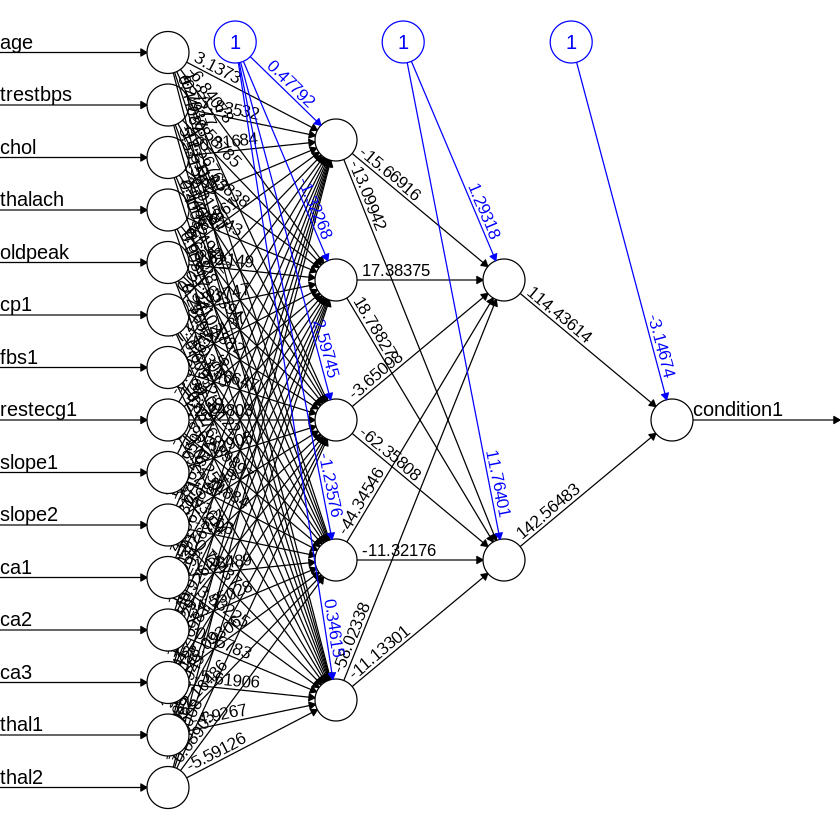

In [57]:

plot(fit.nn.52, 
     rep="best")

Setting levels: control = 1, case = 2

Setting direction: controls < cases



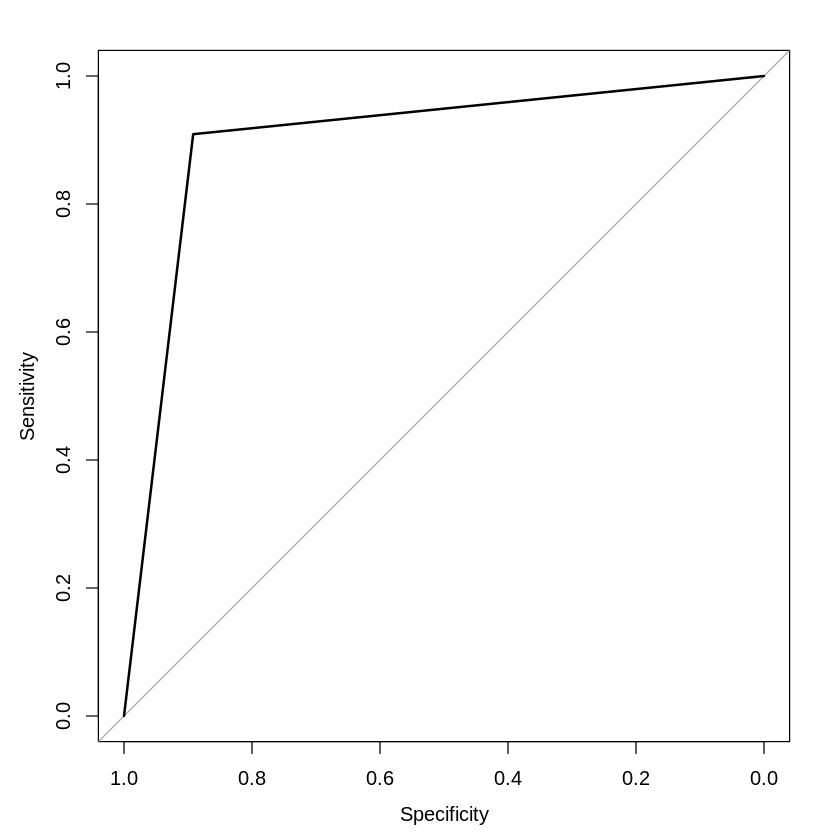

In [58]:
ROC_nn <- roc(as.numeric(vali_cbind$condition1), as.numeric(predict.nn_52))
plot(ROC_nn)
     

In [59]:
# Loading the packages
if(!require("caret")){install.packages("caret")}
if(!require("tidyverse")){install.packages("tidyverse")}
if(!require("ISLR2")){install.packages("ISLR2")}
if(!require("boot")){install.packages("boot")}
if(!require("MASS")){ install.packages("MASS")}
if(!require("leaps")){ install.packages("leaps")}
if(!require("glmnet")){ install.packages("glmnet")}
if(!require("e1071")){ install.packages("e1071")}
if(!require("pROC")){ install.packages("pROC")}
if(!require("class")){ install.packages("class")}
if(!require("reshape2")){ install.packages("reshape2")}
library(boot)
library(caret)  # Package for machine learning modelling functions.
library(tidyverse)
library(ISLR)
library(MASS)
library(leaps)
library(glmnet)
library(e1071) # If you face an issue on mac for installing this package use https://wlu.syzygy.ca platform for practice
library(pROC)
library(class)
library(reshape2)
library('ggplot2')
library('GGally')

Loading required package: boot


Attaching package: ‘boot’


The following object is masked from ‘package:lattice’:

    melanoma


Loading required package: glmnet

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-2

Loading required package: class

Loading required package: reshape2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘ISLR’


The following objects are masked from ‘package:ISLR2’:

    Auto, Credit




In [60]:
set.seed(999)
validation <- sample_frac(heart, 0.2) #leave for final validation
validation_index <- as.numeric(rownames(validation))
train <- heart[-validation_index,]

tr <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

In [61]:

# KNN - unscaled
fit.lr.full <- train(condition~., data=train, method="glm",family="binomial", trControl=tr)
fit.knn.full <- train(condition~., data=train, method="knn", trControl=tr, tuneGrid = expand.grid(k = seq(1, 35, 1)))
results <- resamples(list(KNN=fit.knn.full,LR=fit.lr.full))

fit.knn.full

k-Nearest Neighbors 

237 samples
 13 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 213, 214, 214, 213, 213, 213, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.5705507  0.1417103
   2  0.6047343  0.2086151
   3  0.6452126  0.2890262
   4  0.6463043  0.2915536
   5  0.6372971  0.2742961
   6  0.6511957  0.3012355
   7  0.6642246  0.3284921
   8  0.6554734  0.3104072
   9  0.6697802  0.3387901
  10  0.6569831  0.3130747
  11  0.6639928  0.3272918
  12  0.6737150  0.3464672
  13  0.6792150  0.3574878
  14  0.6623019  0.3237060
  15  0.6708768  0.3413211
  16  0.6681039  0.3350664
  17  0.6609783  0.3208390
  18  0.6665990  0.3318018
  19  0.6597101  0.3171734
  20  0.6581449  0.3134118
  21  0.6751739  0.3479981
  22  0.6735435  0.3445158
  23  0.6669565  0.3313694
  24  0.6696087  0.3371360
  25  0.6696787  0.3371181
  26  0.6824106  0.3629478
  27  0.6794010  0

In [64]:

pred.knn.full <- predict(fit.knn.full, newdata = validation)
# Compute accuracy
cm.knn.full <- confusionMatrix(pred.knn.full, validation$condition)
accuracy.knn.full<-cm.knn.full$overall['Accuracy']
accuracy.knn.full
                               

Accuracy 
0.7627119

In [65]:
cm.knn.full

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 28  5
         1  9 17
                                          
               Accuracy : 0.7627          
                 95% CI : (0.6341, 0.8638)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : 0.01934         
                                          
                  Kappa : 0.5107          
                                          
 Mcnemar's Test P-Value : 0.42268         
                                          
            Sensitivity : 0.7568          
            Specificity : 0.7727          
         Pos Pred Value : 0.8485          
         Neg Pred Value : 0.6538          
             Prevalence : 0.6271          
         Detection Rate : 0.4746          
   Detection Prevalence : 0.5593          
      Balanced Accuracy : 0.7647          
                                          
       'Positive' Class : 0               
                                    

In [66]:
# KNN - scaled - min-max

fit.knn_scaled.full <- train(condition~., data=train, method="knn", trControl=tr, preProcess = 'range', tuneGrid = expand.grid(k = seq(1, 35, 1)))
fit.knn_scaled.full
     

k-Nearest Neighbors 

237 samples
 13 predictor
  2 classes: '0', '1' 

Pre-processing: re-scaling to [0, 1] (17) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 214, 213, 214, 213, 214, 213, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.7774783  0.5550780
   2  0.7986643  0.5975729
   3  0.8469227  0.6935028
   4  0.8370145  0.6740444
   5  0.8484831  0.6971066
   6  0.8371908  0.6747726
   7  0.8329638  0.6665072
   8  0.8345845  0.6700916
   9  0.8303019  0.6612375
  10  0.8317512  0.6642620
  11  0.8287971  0.6583022
  12  0.8301860  0.6610164
  13  0.8287367  0.6580798
  14  0.8330845  0.6669107
  15  0.8330242  0.6667519
  16  0.8304227  0.6615765
  17  0.8318116  0.6642462
  18  0.8289130  0.6585255
  19  0.8316957  0.6640033
  20  0.8303019  0.6613243
  21  0.8387005  0.6781158
  22  0.8359227  0.6724520
  23  0.8373116  0.6753380
  24  0.8346546  0.6698614
  25  0.8402705  0.6810229
  26  0.8388213  0.6

In [69]:

pred.knn_scaled.full <- predict(fit.knn_scaled.full, newdata = validation)
# Compute accuracy
cm.knn_scaled.full <- confusionMatrix(pred.knn_scaled.full, validation$condition)
accuracy.knn_scaled.full<-cm.knn_scaled.full$overall['Accuracy']
accuracy.knn_scaled.full

Accuracy 
0.9152542

In [70]:

cm.knn_scaled.full

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 35  3
         1  2 19
                                          
               Accuracy : 0.9153          
                 95% CI : (0.8132, 0.9719)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : 4.826e-07       
                                          
                  Kappa : 0.8171          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9459          
            Specificity : 0.8636          
         Pos Pred Value : 0.9211          
         Neg Pred Value : 0.9048          
             Prevalence : 0.6271          
         Detection Rate : 0.5932          
   Detection Prevalence : 0.6441          
      Balanced Accuracy : 0.9048          
                                          
       'Positive' Class : 0               
                                    

In [71]:
# Adaboost + Decision Tree

# Perform One-Hot Encoding
dummy <- dummyVars("~.", data=heart)
final_heart <- data.frame(predict(dummy, newdata=heart))
x_final_heart <- final_heart[, -c(ncol(final_heart)-1, ncol(final_heart))]
condition <- heart[, ncol(heart)]

In [72]:

train_x <- x_final_heart[-validation_index,]
train_y <- condition[-validation_index]
     

In [73]:
train_combined <- cbind(train_x, train_y)

In [74]:

val_x <- x_final_heart[validation_index,]
val_y <- condition[validation_index]
     

In [75]:
val_combined <- cbind(val_x, val_y)

In [77]:
#install.packages('adabag') 
if(!require("adabag")){ install.packages("adabag")}# for fitting the adaboost model
library(adabag)
       

Loading required package: adabag

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘adabag’”
Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

also installing the dependency ‘doParallel’


Loading required package: rpart

Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel



In [79]:
set.seed(999)
k <- 10

cv_adaboost <- function(mfinal, k) {
    # Create a vector to store the accuracy results
    accuracy_results_test <- numeric(k)
    accuracy_results_val <- numeric(k)
    
    confusion_matrices_test <- list()
    confusion_matrices_val <- list()
    
    sensitivity_results_test <- numeric(k)
    sensitivity_results_val <- numeric(k)
    
    specificity_results_test <- numeric(k)
    specificity_results_val <- numeric(k)

    # Perform k-fold cross-validation
    indices <- createFolds(train_combined$train_y, k = k)
    ind <- 1
    for (i in seq_along(indices)) {
      # Split the data into training and validation sets
      train_indices <- unlist(indices[-i], use.names = FALSE)
      test_indices <- indices[[i]]
  
      train_set <- train_combined[train_indices, ]
      cv_train_set_x <- train_set[, -ncol(train_set)]
      cv_train_set_y <- train_set[, ncol(train_set)]
      
      test_set <- train_combined[test_indices, ]
      cv_test_set_x <- test_set[, -ncol(test_set)]
      cv_test_set_y <- test_set[, ncol(test_set)]   
      
        # Normalize
        
      process <- preProcess(as.data.frame(cv_train_set_x), method=c("range"))
      train_norm_x <- predict(process, as.data.frame(cv_train_set_x))
      train_norm_combined <- cbind(train_norm_x, cv_train_set_y)
        
      test_norm_x <- predict(process, as.data.frame(cv_test_set_x))
      test_norm_combined <- cbind(test_norm_x, cv_test_set_y)
        
      val_norm_x <- predict(process, as.data.frame(val_x))        
      val_norm_combined <- cbind(val_norm_x, val_y)
  
      # Train the AdaBoost model
      model_adaboost <- boosting(cv_train_set_y ~ ., data = train_norm_combined, boos = TRUE, mfinal = mfinal)
  
      # Make predictions on the validation set
      predictions <- predict(model_adaboost, test_norm_combined)
      predictions_val = predict(model_adaboost, val_norm_combined)
           
      # convert to the same level of factor
      predictions$class <- factor(predictions$class, levels = c("0", "1"))
      test_norm_combined$cv_test_set_y <- factor(test_norm_combined$cv_test_set_y, levels = c("0", "1"))
        
      predictions_val$class <- factor(predictions_val$class, levels = c("0", "1"))
      val_norm_combined$val_y <- factor(val_norm_combined$val_y, levels = c("0", "1"))
        
      # Calculate the accuracy for the current fold
      accuracy_test <- sum(predictions$class == test_norm_combined$cv_test_set_y) / length(test_norm_combined$cv_test_set_y)
      accuracy_val <- sum(predictions_val$class == val_norm_combined$val_y) / length(val_norm_combined$val_y)

      confusionMatTest <- confusionMatrix(predictions$class, test_norm_combined$cv_test_set_y)
      confusionMatVal <- confusionMatrix(predictions_val$class, val_norm_combined$val_y)
      
      
      sensitivity_results_test[i] <- confusionMatTest$byClass["Sensitivity"]
      sensitivity_results_val[i] <- confusionMatVal$byClass["Sensitivity"]
        
      specificity_results_test[i] <- confusionMatTest$byClass["Specificity"]
      specificity_results_val[i] <- confusionMatVal$byClass["Specificity"]
        
      confusion_matrices_test[[ind]] <- confusionMatTest
      confusion_matrices_val[[ind]] <- confusionMatVal
      
      # Store the accuracy result
      accuracy_results_test[i] <- accuracy_test
      accuracy_results_val[i] <- accuracy_val
        
        
      ind <- ind + 1
    }

    # Calculate the mean accuracy across all folds
    mean_accuracy_test <- mean(accuracy_results_test)
    mean_accuracy_val <- mean(accuracy_results_val)
    
    mean_sensitivity_test <- mean(sensitivity_results_test)
    mean_sensitivity_val <- mean(sensitivity_results_val)
    
    mean_specificity_test <- mean(specificity_results_test)
    mean_specificity_val <- mean(specificity_results_val)
    
    return (list(fold_test_mean_accuracy = mean_accuracy_test, 
                 val_mean_accuracy = mean_accuracy_val, 
                 
                 mean_sensitivity_test = mean_sensitivity_test, 
                 mean_sensitivity_val = mean_sensitivity_val,
                 mean_specificity_test = mean_specificity_test, 
                 mean_specificity_val = mean_specificity_val))
}

# # res <- cv_adaboost(50, k)
# # print(res)

mfinal_range = seq(10, 100, 20)

mean_fold_accuracies <- numeric(length(mfinal_range))
mean_val_accuracies <- numeric(length(mfinal_range))
mean_sensitivity_tests <- numeric(length(mfinal_range))
mean_sensitivity_vals <- numeric(length(mfinal_range))
mean_specificity_tests <- numeric(length(mfinal_range))
mean_specificity_vals <- numeric(length(mfinal_range))


for (i in seq_along(mfinal_range)) {
    res <- cv_adaboost(mfinal_range[i], k)
    mean_fold_accuracies[i] = res$fold_test_mean_accuracy
    mean_val_accuracies[i] = res$val_mean_accuracy
    mean_sensitivity_tests[i] = res$mean_sensitivity_test
    mean_sensitivity_vals[i] = res$mean_sensitivity_val
    mean_specificity_tests[i] = res$mean_specificity_test
    mean_specificity_vals[i] = res$mean_specificity_val
    
}

print(mean_fold_accuracies)
print(mean_val_accuracies)
print(mean_sensitivity_tests)
print(mean_sensitivity_vals)
print(mean_specificity_tests)
print(mean_specificity_vals)




# # # Print the mean accuracy
# # print(mean_accuracy)
# # print(mean_accuracy_val)

[1] 0.8007246 0.7771739 0.7936594 0.7938406 0.7973768
[1] 0.7355932 0.7474576 0.7457627 0.7237288 0.7457627
[1] 0.7659091 0.7871212 0.7946970 0.8000000 0.8181818
[1] 0.7953488 0.8162791 0.8418605 0.8232558 0.8581395
[1] 0.8352564 0.7679487 0.7935897 0.7852564 0.7775641
[1] 0.57500 0.56250 0.48750 0.45625 0.44375


In [80]:
# Find the index of the highest mean accuracy
best_index <- which.max(mean_fold_accuracies)

# Find the optimal mfinal value
best_mfinal <- mfinal_range[best_index]

# Print the optimal mfinal value and the corresponding mean accuracy
print(paste("Best mfinal:", best_mfinal, "with mean fold accuracy:", mean_fold_accuracies[best_index], "with mean val accuracy", mean_val_accuracies[best_index]))
    

[1] "Best mfinal: 10 with mean fold accuracy: 0.800724637681159 with mean val accuracy 0.735593220338983"


In [81]:

## Decision Tree
fit.dt_scaled.full <- train(condition~., data=train, method="rpart", trControl=tr, preProcess = 'range')
fit.dt_scaled.full
     

CART 

237 samples
 13 predictor
  2 classes: '0', '1' 

Pre-processing: re-scaling to [0, 1] (17) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 213, 213, 213, 214, 214, 213, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa     
  0.03448276  0.7631860  0.52560117
  0.06465517  0.7379348  0.47531414
  0.50000000  0.5529638  0.09149067

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.03448276.

In [83]:
pred.dt_scaled.full <- predict(fit.dt_scaled.full, newdata = validation)
# Compute accuracy
cm.dt_scaled.full <- confusionMatrix(pred.dt_scaled.full, validation$condition)
accuracy.dt_scaled.full <- cm.dt_scaled.full$overall['Accuracy']
accuracy.dt_scaled.full
cm.dt_scaled.full

Accuracy 
0.8135593

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 29  3
         1  8 19
                                          
               Accuracy : 0.8136          
                 95% CI : (0.6909, 0.9031)
    No Information Rate : 0.6271          
    P-Value [Acc > NIR] : 0.00158         
                                          
                  Kappa : 0.6189          
                                          
 Mcnemar's Test P-Value : 0.22780         
                                          
            Sensitivity : 0.7838          
            Specificity : 0.8636          
         Pos Pred Value : 0.9062          
         Neg Pred Value : 0.7037          
             Prevalence : 0.6271          
         Detection Rate : 0.4915          
   Detection Prevalence : 0.5424          
      Balanced Accuracy : 0.8237          
                                          
       'Positive' Class : 0               
                                    